# 머신러닝 라이브러리 없이 알고리즘 구현하기


one-feature dataset으로 y=0*x + 1*sqrt(x) polynomial regression 구현

## dataset
x는 1부터 1000까지 자연수이며, lebel인 y는 sqrt(x)±(-1부터 1까지 랜덤 실수) 이다.

## hypothesis
h(x)=θ_0 * bias(1) + θ_1 * x + θ_2 * √x가 가설이며, 예상 parameter는 다음과 같다.

θ_0 ≈ 0

θ_1 ≈ 0

θ_2 ≈ 1

## Cost Function

비용함수로는 mean_square_error를 사용했다.

## hyper parameter

learning rate는 0.000000015, epoch은 30000회로 설정 하였다.

In [5]:
import math
import random
import matplotlib.pyplot as plt
import csv

data_x=[]
data_y=[]
X=[]
Y=[]



f=open('one_feature.csv','r',encoding='utf-8')
rdr=csv.reader(f)
for line in rdr:
    a=list(line)
    if (a[0]==''):
        break
    if("NA" in a):
        continue
    data_x.append([a[0]])
    data_y.append(a[1]) 
f.close()

#데이터 확인
print("x\ty")
for i in range(len(data_x)):
    print(float(data_x[i][0]),"\t",float(data_y[i]))


for i in range(len(data_x)):
    Y.append(float(data_y[i]))
    for j in range(len(data_x[i])):
        X.append([float(data_x[i][j])])

"""
for i in range(len(X)):
    for j in range(len(X[i])):
        X[i][j]=(X[i][j]-sum(X[i])/len(X[i]))/(max(X[i])-min(X[i]))
"""
    
for i in range(len(X)):
    X[i].append(math.sqrt(X[i][0]))
    X[i].insert(0, 1) #bias 항 추가

lr=0.000000015
epoches=30000
theta=[]
for i in range(len(X[0])):
    theta.append(random.uniform(min(Y)/len(Y), max(Y)/len(Y)))

def H(x): #Hyphothesis
    res=0
    for i in range(len(x)):
        res+=theta[i]*x[i]
    return res

def cost(x, target):
    #print(H(x), target)
    return 0.5*(1/len(theta))*pow(H(x)-target,2)

x	y
1.0 	 2.985795986
2.0 	 2.85084581
3.0 	 3.055256576
4.0 	 1.353616657
5.0 	 2.471990622
6.0 	 3.902786101
7.0 	 4.065374041
8.0 	 3.627735115
9.0 	 4.038831421
10.0 	 3.330045503
11.0 	 3.23659778
12.0 	 3.531680798
13.0 	 3.120035685
14.0 	 5.633285044
15.0 	 5.496669283
16.0 	 2.597821891
17.0 	 4.211306784
18.0 	 5.394056331
19.0 	 2.722219208
20.0 	 2.917180574
21.0 	 3.409036209
22.0 	 3.830547923
23.0 	 3.388584489
24.0 	 5.197647559
25.0 	 5.815953138
26.0 	 5.028114604
27.0 	 6.357840516
28.0 	 4.955987893
29.0 	 5.063557812
30.0 	 6.76652441
31.0 	 5.652204162
32.0 	 4.589495172
33.0 	 4.161566245
34.0 	 5.889576811
35.0 	 5.947530802
36.0 	 6.053819872
37.0 	 6.268738718
38.0 	 7.253844201
39.0 	 5.924713723
40.0 	 4.52424482
41.0 	 5.869795968
42.0 	 7.202452019
43.0 	 7.292528035
44.0 	 7.074676265
45.0 	 6.153511831
46.0 	 5.543624412
47.0 	 5.120548668
48.0 	 6.769204378
49.0 	 5.844892109
50.0 	 6.573003343
51.0 	 6.642308405
52.0 	 6.877960402
53.0 	 8.173049096
54

663.0 	 24.51796836
664.0 	 24.05093294
665.0 	 26.20815509
666.0 	 25.86710221
667.0 	 24.72336873
668.0 	 25.53558299
669.0 	 26.72558394
670.0 	 24.82639457
671.0 	 26.05933353
672.0 	 24.70165498
673.0 	 25.8067909
674.0 	 25.00407294
675.0 	 27.76012478
676.0 	 24.39410158
677.0 	 25.52530411
678.0 	 26.56776975
679.0 	 26.42132922
680.0 	 25.46951763
681.0 	 26.46337554
682.0 	 27.67660382
683.0 	 24.67558567
684.0 	 25.42259987
685.0 	 25.44358601
686.0 	 25.11034632
687.0 	 26.70271026
688.0 	 26.28435172
689.0 	 25.74846576
690.0 	 24.81698148
691.0 	 27.87087323
692.0 	 27.6472479
693.0 	 25.62602474
694.0 	 27.70783813
695.0 	 27.66800191
696.0 	 25.80154214
697.0 	 26.81994458
698.0 	 25.23484529
699.0 	 28.4194877
700.0 	 25.69949568
701.0 	 26.35811728
702.0 	 27.01249921
703.0 	 25.14639741
704.0 	 26.29234024
705.0 	 27.03518828
706.0 	 26.09656361
707.0 	 26.77032416
708.0 	 25.67137218
709.0 	 27.5419102
710.0 	 25.7585955
711.0 	 26.11280869
712.0 	 28.48405995
713.0

In [6]:
J_res=[]
    

print("initial parameters:", theta)
for epoch in range(epoches):
    J=0
    partial_derivative=[]
    for i in range(len(theta)):
        partial_derivative.append(0)
        
    for j in range(len(theta)):
        for i in range(len(X)):
            partial_derivative[j]+=(1/len(theta))*(H(X[i])-Y[i])*X[i][j]
            
    for i in range(len(theta)):
        theta[i]-=lr*partial_derivative[i]
    
    for i in range(len(X)):
        J+=cost(X[i], Y[i])
    J_res.append(J)
    print("epoch:",epoch, "cost value:",J)
    

initial parameters: [0.009193837669109107, 0.018488713159964365, 0.013324662613440525]
epoch: 0 cost value: 12418.293004817815
epoch: 1 cost value: 7507.682736245763
epoch: 2 cost value: 5292.581067507145
epoch: 3 cost value: 4293.18448555205
epoch: 4 cost value: 3842.084787512717
epoch: 5 cost value: 3638.2732885610867
epoch: 6 cost value: 3545.991650759421
epoch: 7 cost value: 3504.01132074366
epoch: 8 cost value: 3484.7175250486926
epoch: 9 cost value: 3475.655686975751
epoch: 10 cost value: 3471.208650868542
epoch: 11 cost value: 3468.843015670463
epoch: 12 cost value: 3467.416188697303
epoch: 13 cost value: 3466.412847647867
epoch: 14 cost value: 3465.600576292772
epoch: 15 cost value: 3464.874552256387
epoch: 16 cost value: 3464.1874994412515
epoch: 17 cost value: 3463.5180957754164
epoch: 18 cost value: 3462.8567247474093
epoch: 19 cost value: 3462.1990491865754
epoch: 20 cost value: 3461.5431129649533
epoch: 21 cost value: 3460.8880338319323
epoch: 22 cost value: 3460.233413867

epoch: 210 cost value: 3339.535538958403
epoch: 211 cost value: 3338.905715772428
epoch: 212 cost value: 3338.2760198892497
epoch: 213 cost value: 3337.6464512831544
epoch: 214 cost value: 3337.0170099284064
epoch: 215 cost value: 3336.387695799284
epoch: 216 cost value: 3335.7585088700826
epoch: 217 cost value: 3335.1294491150743
epoch: 218 cost value: 3334.5005165085768
epoch: 219 cost value: 3333.871711024875
epoch: 220 cost value: 3333.243032638268
epoch: 221 cost value: 3332.6144813230862
epoch: 222 cost value: 3331.986057053626
epoch: 223 cost value: 3331.357759804224
epoch: 224 cost value: 3330.7295895491993
epoch: 225 cost value: 3330.1015462628784
epoch: 226 cost value: 3329.473629919607
epoch: 227 cost value: 3328.845840493718
epoch: 228 cost value: 3328.2181779595644
epoch: 229 cost value: 3327.5906422915023
epoch: 230 cost value: 3326.963233463879
epoch: 231 cost value: 3326.335951451061
epoch: 232 cost value: 3325.708796227409
epoch: 233 cost value: 3325.081767767314
epoch

epoch: 450 cost value: 3191.9711680008077
epoch: 451 cost value: 3191.371171215353
epoch: 452 cost value: 3190.7712957040594
epoch: 453 cost value: 3190.1715414424075
epoch: 454 cost value: 3189.571908405881
epoch: 455 cost value: 3188.9723965700077
epoch: 456 cost value: 3188.3730059102513
epoch: 457 cost value: 3187.7737364021473
epoch: 458 cost value: 3187.1745880211947
epoch: 459 cost value: 3186.5755607429105
epoch: 460 cost value: 3185.9766545428215
epoch: 461 cost value: 3185.3778693964587
epoch: 462 cost value: 3184.7792052793448
epoch: 463 cost value: 3184.1806621670194
epoch: 464 cost value: 3183.582240035022
epoch: 465 cost value: 3182.983938858925
epoch: 466 cost value: 3182.3857586142362
epoch: 467 cost value: 3181.78769927654
epoch: 468 cost value: 3181.189760821403
epoch: 469 cost value: 3180.591943224374
epoch: 470 cost value: 3179.994246461034
epoch: 471 cost value: 3179.3966705069574
epoch: 472 cost value: 3178.7992153377236
epoch: 473 cost value: 3178.201880928923
ep

epoch: 671 cost value: 3062.2770275354633
epoch: 672 cost value: 3061.7032451360155
epoch: 673 cost value: 3061.129578712137
epoch: 674 cost value: 3060.5560282404044
epoch: 675 cost value: 3059.982593697376
epoch: 676 cost value: 3059.4092750596183
epoch: 677 cost value: 3058.836072303709
epoch: 678 cost value: 3058.2629854062066
epoch: 679 cost value: 3057.690014343719
epoch: 680 cost value: 3057.117159092815
epoch: 681 cost value: 3056.5444196300864
epoch: 682 cost value: 3055.971795932148
epoch: 683 cost value: 3055.3992879755824
epoch: 684 cost value: 3054.8268957370015
epoch: 685 cost value: 3054.254619193028
epoch: 686 cost value: 3053.6824583202497
epoch: 687 cost value: 3053.1104130953054
epoch: 688 cost value: 3052.538483494817
epoch: 689 cost value: 3051.966669495417
epoch: 690 cost value: 3051.394971073725
epoch: 691 cost value: 3050.8233882063996
epoch: 692 cost value: 3050.2519208700733
epoch: 693 cost value: 3049.6805690413958
epoch: 694 cost value: 3049.1093326970235
ep

epoch: 882 cost value: 2943.742576194255
epoch: 883 cost value: 2943.192752532258
epoch: 884 cost value: 2942.643040003201
epoch: 885 cost value: 2942.093438584594
epoch: 886 cost value: 2941.5439482540055
epoch: 887 cost value: 2940.994568988968
epoch: 888 cost value: 2940.4453007670513
epoch: 889 cost value: 2939.896143565779
epoch: 890 cost value: 2939.3470973627204
epoch: 891 cost value: 2938.798162135462
epoch: 892 cost value: 2938.249337861551
epoch: 893 cost value: 2937.7006245185685
epoch: 894 cost value: 2937.1520220840953
epoch: 895 cost value: 2936.6035305357154
epoch: 896 cost value: 2936.0551498509976
epoch: 897 cost value: 2935.5068800075674
epoch: 898 cost value: 2934.958720982976
epoch: 899 cost value: 2934.4106727548697
epoch: 900 cost value: 2933.862735300822
epoch: 901 cost value: 2933.3149085984574
epoch: 902 cost value: 2932.767192625384
epoch: 903 cost value: 2932.2195873592345
epoch: 904 cost value: 2931.6720927776155
epoch: 905 cost value: 2931.1247088581586
epo

epoch: 1096 cost value: 2828.577347962174
epoch: 1097 cost value: 2828.050802034515
epoch: 1098 cost value: 2827.524362534778
epoch: 1099 cost value: 2826.998029441453
epoch: 1100 cost value: 2826.471802733041
epoch: 1101 cost value: 2825.9456823880187
epoch: 1102 cost value: 2825.4196683849073
epoch: 1103 cost value: 2824.8937607022044
epoch: 1104 cost value: 2824.3679593184174
epoch: 1105 cost value: 2823.8422642120713
epoch: 1106 cost value: 2823.3166753616733
epoch: 1107 cost value: 2822.79119274575
epoch: 1108 cost value: 2822.2658163428337
epoch: 1109 cost value: 2821.7405461314456
epoch: 1110 cost value: 2821.215382090136
epoch: 1111 cost value: 2820.690324197436
epoch: 1112 cost value: 2820.165372431888
epoch: 1113 cost value: 2819.640526772046
epoch: 1114 cost value: 2819.115787196459
epoch: 1115 cost value: 2818.5911536836966
epoch: 1116 cost value: 2818.0666262123145
epoch: 1117 cost value: 2817.542204760874
epoch: 1118 cost value: 2817.017889307942
epoch: 1119 cost value: 2

epoch: 1368 cost value: 2689.2089675317393
epoch: 1369 cost value: 2688.710591392683
epoch: 1370 cost value: 2688.2123159877438
epoch: 1371 cost value: 2687.714141296556
epoch: 1372 cost value: 2687.216067298765
epoch: 1373 cost value: 2686.7180939740238
epoch: 1374 cost value: 2686.2202213019737
epoch: 1375 cost value: 2685.722449262275
epoch: 1376 cost value: 2685.224777834592
epoch: 1377 cost value: 2684.7272069985834
epoch: 1378 cost value: 2684.2297367339197
epoch: 1379 cost value: 2683.732367020266
epoch: 1380 cost value: 2683.2350978373065
epoch: 1381 cost value: 2682.737929164724
epoch: 1382 cost value: 2682.2408609821923
epoch: 1383 cost value: 2681.7438932694
epoch: 1384 cost value: 2681.247026006061
epoch: 1385 cost value: 2680.7502591718467
epoch: 1386 cost value: 2680.253592746463
epoch: 1387 cost value: 2679.757026709625
epoch: 1388 cost value: 2679.260561041037
epoch: 1389 cost value: 2678.7641957204173
epoch: 1390 cost value: 2678.267930727467
epoch: 1391 cost value: 26

epoch: 1596 cost value: 2578.146759503554
epoch: 1597 cost value: 2577.6708317772027
epoch: 1598 cost value: 2577.1950002475846
epoch: 1599 cost value: 2576.719264895263
epoch: 1600 cost value: 2576.243625700798
epoch: 1601 cost value: 2575.7680826447518
epoch: 1602 cost value: 2575.292635707684
epoch: 1603 cost value: 2574.8172848701784
epoch: 1604 cost value: 2574.3420301128026
epoch: 1605 cost value: 2573.8668714161463
epoch: 1606 cost value: 2573.3918087607835
epoch: 1607 cost value: 2572.916842127309
epoch: 1608 cost value: 2572.4419714962996
epoch: 1609 cost value: 2571.967196848379
epoch: 1610 cost value: 2571.492518164112
epoch: 1611 cost value: 2571.017935424134
epoch: 1612 cost value: 2570.543448609029
epoch: 1613 cost value: 2570.0690576994252
epoch: 1614 cost value: 2569.5947626759285
epoch: 1615 cost value: 2569.120563519151
epoch: 1616 cost value: 2568.6464602097285
epoch: 1617 cost value: 2568.1724527282904
epoch: 1618 cost value: 2567.6985410554503
epoch: 1619 cost valu

epoch: 1807 cost value: 2479.8275500348227
epoch: 1808 cost value: 2479.371495046731
epoch: 1809 cost value: 2478.915532238611
epoch: 1810 cost value: 2478.4596615918235
epoch: 1811 cost value: 2478.0038830877365
epoch: 1812 cost value: 2477.548196707737
epoch: 1813 cost value: 2477.0926024331943
epoch: 1814 cost value: 2476.637100245503
epoch: 1815 cost value: 2476.181690126041
epoch: 1816 cost value: 2475.7263720562055
epoch: 1817 cost value: 2475.2711460173796
epoch: 1818 cost value: 2474.816011990968
epoch: 1819 cost value: 2474.3609699583776
epoch: 1820 cost value: 2473.906019901013
epoch: 1821 cost value: 2473.451161800282
epoch: 1822 cost value: 2472.996395637585
epoch: 1823 cost value: 2472.541721394355
epoch: 1824 cost value: 2472.0871390520147
epoch: 1825 cost value: 2471.6326485919876
epoch: 1826 cost value: 2471.178249995685
epoch: 1827 cost value: 2470.723943244556
epoch: 1828 cost value: 2470.269728320026
epoch: 1829 cost value: 2469.8156052035447
epoch: 1830 cost value: 

epoch: 2010 cost value: 2389.1130153135127
epoch: 2011 cost value: 2388.675295971279
epoch: 2012 cost value: 2388.237665102915
epoch: 2013 cost value: 2387.800122690557
epoch: 2014 cost value: 2387.3626687163096
epoch: 2015 cost value: 2386.9253031623093
epoch: 2016 cost value: 2386.4880260106743
epoch: 2017 cost value: 2386.0508372435397
epoch: 2018 cost value: 2385.613736843052
epoch: 2019 cost value: 2385.176724791335
epoch: 2020 cost value: 2384.7398010705397
epoch: 2021 cost value: 2384.302965662802
epoch: 2022 cost value: 2383.8662185502903
epoch: 2023 cost value: 2383.4295597151413
epoch: 2024 cost value: 2382.9929891395145
epoch: 2025 cost value: 2382.556506805575
epoch: 2026 cost value: 2382.1201126954825
epoch: 2027 cost value: 2381.683806791415
epoch: 2028 cost value: 2381.247589075535
epoch: 2029 cost value: 2380.8114595300162
epoch: 2030 cost value: 2380.3754181370405
epoch: 2031 cost value: 2379.9394648787897
epoch: 2032 cost value: 2379.5035997374475
epoch: 2033 cost val

epoch: 2224 cost value: 2297.4289874416313
epoch: 2225 cost value: 2297.009799703727
epoch: 2226 cost value: 2296.5906966940106
epoch: 2227 cost value: 2296.1716783953525
epoch: 2228 cost value: 2295.752744790633
epoch: 2229 cost value: 2295.3338958627296
epoch: 2230 cost value: 2294.9151315945323
epoch: 2231 cost value: 2294.4964519689247
epoch: 2232 cost value: 2294.0778569687964
epoch: 2233 cost value: 2293.659346577055
epoch: 2234 cost value: 2293.240920776584
epoch: 2235 cost value: 2292.8225795502954
epoch: 2236 cost value: 2292.4043228810915
epoch: 2237 cost value: 2291.9861507518767
epoch: 2238 cost value: 2291.56806314557
epoch: 2239 cost value: 2291.150060045087
epoch: 2240 cost value: 2290.7321414333396
epoch: 2241 cost value: 2290.314307293262
epoch: 2242 cost value: 2289.896557607771
epoch: 2243 cost value: 2289.4788923598007
epoch: 2244 cost value: 2289.0613115322844
epoch: 2245 cost value: 2288.6438151081497
epoch: 2246 cost value: 2288.2264030703536
epoch: 2247 cost val

epoch: 2434 cost value: 2211.233135779681
epoch: 2435 cost value: 2210.831370350289
epoch: 2436 cost value: 2210.4296861275907
epoch: 2437 cost value: 2210.0280830951933
epoch: 2438 cost value: 2209.6265612366706
epoch: 2439 cost value: 2209.225120535627
epoch: 2440 cost value: 2208.823760975662
epoch: 2441 cost value: 2208.4224825403576
epoch: 2442 cost value: 2208.021285213329
epoch: 2443 cost value: 2207.620168978184
epoch: 2444 cost value: 2207.21913381852
epoch: 2445 cost value: 2206.8181797179636
epoch: 2446 cost value: 2206.4173066601234
epoch: 2447 cost value: 2206.0165146286186
epoch: 2448 cost value: 2205.6158036070747
epoch: 2449 cost value: 2205.2151735791144
epoch: 2450 cost value: 2204.814624528366
epoch: 2451 cost value: 2204.41415643847
epoch: 2452 cost value: 2204.0137692930457
epoch: 2453 cost value: 2203.613463075755
epoch: 2454 cost value: 2203.2132377702246
epoch: 2455 cost value: 2202.813093360101
epoch: 2456 cost value: 2202.41302982904
epoch: 2457 cost value: 22

epoch: 2691 cost value: 2110.605483514759
epoch: 2692 cost value: 2110.2240574168686
epoch: 2693 cost value: 2109.842708414603
epoch: 2694 cost value: 2109.4614364923827
epoch: 2695 cost value: 2109.0802416346232
epoch: 2696 cost value: 2108.699123825755
epoch: 2697 cost value: 2108.31808305019
epoch: 2698 cost value: 2107.937119292379
epoch: 2699 cost value: 2107.5562325367378
epoch: 2700 cost value: 2107.175422767707
epoch: 2701 cost value: 2106.79468996973
epoch: 2702 cost value: 2106.4140341272478
epoch: 2703 cost value: 2106.0334552246995
epoch: 2704 cost value: 2105.6529532465406
epoch: 2705 cost value: 2105.272528177219
epoch: 2706 cost value: 2104.8921800011935
epoch: 2707 cost value: 2104.511908702917
epoch: 2708 cost value: 2104.1317142668518
epoch: 2709 cost value: 2103.751596677466
epoch: 2710 cost value: 2103.3715559192256
epoch: 2711 cost value: 2102.991591976601
epoch: 2712 cost value: 2102.6117048340634
epoch: 2713 cost value: 2102.231894476085
epoch: 2714 cost value: 2

epoch: 2899 cost value: 2032.9057709022707
epoch: 2900 cost value: 2032.540049833534
epoch: 2901 cost value: 2032.1744026860572
epoch: 2902 cost value: 2031.8088294448805
epoch: 2903 cost value: 2031.4433300950845
epoch: 2904 cost value: 2031.077904621722
epoch: 2905 cost value: 2030.7125530098706
epoch: 2906 cost value: 2030.347275244588
epoch: 2907 cost value: 2029.9820713109584
epoch: 2908 cost value: 2029.6169411940552
epoch: 2909 cost value: 2029.2518848789537
epoch: 2910 cost value: 2028.8869023507468
epoch: 2911 cost value: 2028.521993594512
epoch: 2912 cost value: 2028.1571585953438
epoch: 2913 cost value: 2027.792397338327
epoch: 2914 cost value: 2027.4277098085704
epoch: 2915 cost value: 2027.063095991149
epoch: 2916 cost value: 2026.698555871182
epoch: 2917 cost value: 2026.334089433769
epoch: 2918 cost value: 2025.9696966640174
epoch: 2919 cost value: 2025.6053775470355
epoch: 2920 cost value: 2025.241132067934
epoch: 2921 cost value: 2024.8769602118355
epoch: 2922 cost val

epoch: 3148 cost value: 1944.086102220289
epoch: 3149 cost value: 1943.7383337982224
epoch: 3150 cost value: 1943.390635668731
epoch: 3151 cost value: 1943.043007817613
epoch: 3152 cost value: 1942.6954502306578
epoch: 3153 cost value: 1942.347962893671
epoch: 3154 cost value: 1942.000545792444
epoch: 3155 cost value: 1941.6531989127884
epoch: 3156 cost value: 1941.3059222405104
epoch: 3157 cost value: 1940.9587157614133
epoch: 3158 cost value: 1940.6115794613152
epoch: 3159 cost value: 1940.2645133260253
epoch: 3160 cost value: 1939.9175173413705
epoch: 3161 cost value: 1939.570591493166
epoch: 3162 cost value: 1939.2237357672282
epoch: 3163 cost value: 1938.8769501493964
epoch: 3164 cost value: 1938.5302346254998
epoch: 3165 cost value: 1938.1835891813573
epoch: 3166 cost value: 1937.8370138028179
epoch: 3167 cost value: 1937.490508475712
epoch: 3168 cost value: 1937.144073185884
epoch: 3169 cost value: 1936.797707919174
epoch: 3170 cost value: 1936.451412661433
epoch: 3171 cost valu

epoch: 3446 cost value: 1843.5006480757004
epoch: 3447 cost value: 1843.173210455857
epoch: 3448 cost value: 1842.8458390192302
epoch: 3449 cost value: 1842.5185337524538
epoch: 3450 cost value: 1842.191294642144
epoch: 3451 cost value: 1841.8641216749368
epoch: 3452 cost value: 1841.5370148374543
epoch: 3453 cost value: 1841.2099741163408
epoch: 3454 cost value: 1840.8829994982245
epoch: 3455 cost value: 1840.5560909697438
epoch: 3456 cost value: 1840.2292485175456
epoch: 3457 cost value: 1839.9024721282735
epoch: 3458 cost value: 1839.5757617885686
epoch: 3459 cost value: 1839.249117485089
epoch: 3460 cost value: 1838.9225392044814
epoch: 3461 cost value: 1838.596026933401
epoch: 3462 cost value: 1838.269580658508
epoch: 3463 cost value: 1837.9432003664626
epoch: 3464 cost value: 1837.6168860439293
epoch: 3465 cost value: 1837.2906376775704
epoch: 3466 cost value: 1836.9644552540578
epoch: 3467 cost value: 1836.638338760062
epoch: 3468 cost value: 1836.312288182254
epoch: 3469 cost v

epoch: 3655 cost value: 1776.4848881729176
epoch: 3656 cost value: 1776.1709960917601
epoch: 3657 cost value: 1775.8571674559373
epoch: 3658 cost value: 1775.5434022526247
epoch: 3659 cost value: 1775.2297004689976
epoch: 3660 cost value: 1774.9160620922419
epoch: 3661 cost value: 1774.6024871095449
epoch: 3662 cost value: 1774.2889755080887
epoch: 3663 cost value: 1773.9755272750613
epoch: 3664 cost value: 1773.6621423976567
epoch: 3665 cost value: 1773.3488208630706
epoch: 3666 cost value: 1773.0355626584972
epoch: 3667 cost value: 1772.7223677711384
epoch: 3668 cost value: 1772.4092361881892
epoch: 3669 cost value: 1772.0961678968597
epoch: 3670 cost value: 1771.7831628843599
epoch: 3671 cost value: 1771.4702211378947
epoch: 3672 cost value: 1771.1573426446837
epoch: 3673 cost value: 1770.8445273919278
epoch: 3674 cost value: 1770.5317753668571
epoch: 3675 cost value: 1770.2190865566897
epoch: 3676 cost value: 1769.906460948644
epoch: 3677 cost value: 1769.593898529947
epoch: 3678 c

epoch: 3891 cost value: 1704.1382824314908
epoch: 3892 cost value: 1703.8390133845014
epoch: 3893 cost value: 1703.5398048271668
epoch: 3894 cost value: 1703.2406567472651
epoch: 3895 cost value: 1702.9415691325762
epoch: 3896 cost value: 1702.6425419708696
epoch: 3897 cost value: 1702.343575249931
epoch: 3898 cost value: 1702.0446689575463
epoch: 3899 cost value: 1701.7458230814962
epoch: 3900 cost value: 1701.4470376095737
epoch: 3901 cost value: 1701.1483125295665
epoch: 3902 cost value: 1700.8496478292682
epoch: 3903 cost value: 1700.5510434964735
epoch: 3904 cost value: 1700.2524995189885
epoch: 3905 cost value: 1699.9540158846062
epoch: 3906 cost value: 1699.6555925811285
epoch: 3907 cost value: 1699.3572295963645
epoch: 3908 cost value: 1699.0589269181212
epoch: 3909 cost value: 1698.760684534214
epoch: 3910 cost value: 1698.4625024324482
epoch: 3911 cost value: 1698.1643806006437
epoch: 3912 cost value: 1697.8663190266143
epoch: 3913 cost value: 1697.5683176981902
epoch: 3914 c

epoch: 4101 cost value: 1642.600818309211
epoch: 4102 cost value: 1642.3139875021434
epoch: 4103 cost value: 1642.0272146706754
epoch: 4104 cost value: 1641.74049980306
epoch: 4105 cost value: 1641.453842887594
epoch: 4106 cost value: 1641.1672439125684
epoch: 4107 cost value: 1640.8807028662673
epoch: 4108 cost value: 1640.5942197369786
epoch: 4109 cost value: 1640.307794513004
epoch: 4110 cost value: 1640.021427182634
epoch: 4111 cost value: 1639.735117734161
epoch: 4112 cost value: 1639.4488661559012
epoch: 4113 cost value: 1639.1626724361442
epoch: 4114 cost value: 1638.876536563203
epoch: 4115 cost value: 1638.5904585253793
epoch: 4116 cost value: 1638.3044383109864
epoch: 4117 cost value: 1638.0184759083377
epoch: 4118 cost value: 1637.7325713057432
epoch: 4119 cost value: 1637.446724491526
epoch: 4120 cost value: 1637.1609354540003
epoch: 4121 cost value: 1636.8752041814955
epoch: 4122 cost value: 1636.5895306623288
epoch: 4123 cost value: 1636.3039148848245
epoch: 4124 cost val

epoch: 4301 cost value: 1586.373132205354
epoch: 4302 cost value: 1586.0976664010668
epoch: 4303 cost value: 1585.822256275214
epoch: 4304 cost value: 1585.5469018165506
epoch: 4305 cost value: 1585.2716030138083
epoch: 4306 cost value: 1584.9963598557542
epoch: 4307 cost value: 1584.7211723311307
epoch: 4308 cost value: 1584.446040428699
epoch: 4309 cost value: 1584.1709641372097
epoch: 4310 cost value: 1583.895943445433
epoch: 4311 cost value: 1583.620978342116
epoch: 4312 cost value: 1583.3460688160376
epoch: 4313 cost value: 1583.071214855952
epoch: 4314 cost value: 1582.7964164506377
epoch: 4315 cost value: 1582.52167358886
epoch: 4316 cost value: 1582.2469862593978
epoch: 4317 cost value: 1581.9723544510177
epoch: 4318 cost value: 1581.6977781525063
epoch: 4319 cost value: 1581.4232573526374
epoch: 4320 cost value: 1581.148792040194
epoch: 4321 cost value: 1580.8743822039664
epoch: 4322 cost value: 1580.600027832736
epoch: 4323 cost value: 1580.3257289152966
epoch: 4324 cost valu

epoch: 4498 cost value: 1533.167311505288
epoch: 4499 cost value: 1532.9025999102184
epoch: 4500 cost value: 1532.6379418198906
epoch: 4501 cost value: 1532.373337223487
epoch: 4502 cost value: 1532.1087861102076
epoch: 4503 cost value: 1531.844288469235
epoch: 4504 cost value: 1531.5798442897626
epoch: 4505 cost value: 1531.3154535609856
epoch: 4506 cost value: 1531.051116272096
epoch: 4507 cost value: 1530.7868324122908
epoch: 4508 cost value: 1530.5226019707795
epoch: 4509 cost value: 1530.2584249367599
epoch: 4510 cost value: 1529.9943012994397
epoch: 4511 cost value: 1529.730231048022
epoch: 4512 cost value: 1529.4662141717151
epoch: 4513 cost value: 1529.2022506597386
epoch: 4514 cost value: 1528.938340501298
epoch: 4515 cost value: 1528.6744836856135
epoch: 4516 cost value: 1528.4106802019007
epoch: 4517 cost value: 1528.1469300393842
epoch: 4518 cost value: 1527.8832331872795
epoch: 4519 cost value: 1527.6195896348158
epoch: 4520 cost value: 1527.355999371222
epoch: 4521 cost v

epoch: 4725 cost value: 1474.4296575751544
epoch: 4726 cost value: 1474.1768183092838
epoch: 4727 cost value: 1473.9240301484695
epoch: 4728 cost value: 1473.6712930823774
epoch: 4729 cost value: 1473.4186071006836
epoch: 4730 cost value: 1473.1659721930646
epoch: 4731 cost value: 1472.913388349189
epoch: 4732 cost value: 1472.6608555587432
epoch: 4733 cost value: 1472.4083738114043
epoch: 4734 cost value: 1472.1559430968591
epoch: 4735 cost value: 1471.903563404789
epoch: 4736 cost value: 1471.6512347248793
epoch: 4737 cost value: 1471.3989570468245
epoch: 4738 cost value: 1471.146730360314
epoch: 4739 cost value: 1470.894554655037
epoch: 4740 cost value: 1470.6424299206956
epoch: 4741 cost value: 1470.390356146985
epoch: 4742 cost value: 1470.1383333236029
epoch: 4743 cost value: 1469.8863614402546
epoch: 4744 cost value: 1469.6344404866347
epoch: 4745 cost value: 1469.3825704524604
epoch: 4746 cost value: 1469.130751327437
epoch: 4747 cost value: 1468.8789831012666
epoch: 4748 cost 

epoch: 4966 cost value: 1414.949837201837
epoch: 4967 cost value: 1414.7090202753222
epoch: 4968 cost value: 1414.4682520238514
epoch: 4969 cost value: 1414.2275324375817
epoch: 4970 cost value: 1413.9868615066769
epoch: 4971 cost value: 1413.7462392213158
epoch: 4972 cost value: 1413.5056655716464
epoch: 4973 cost value: 1413.2651405478528
epoch: 4974 cost value: 1413.0246641401025
epoch: 4975 cost value: 1412.7842363385653
epoch: 4976 cost value: 1412.54385713342
epoch: 4977 cost value: 1412.3035265148421
epoch: 4978 cost value: 1412.0632444730138
epoch: 4979 cost value: 1411.8230109981146
epoch: 4980 cost value: 1411.5828260803264
epoch: 4981 cost value: 1411.3426897098416
epoch: 4982 cost value: 1411.1026018768382
epoch: 4983 cost value: 1410.862562571511
epoch: 4984 cost value: 1410.622571784054
epoch: 4985 cost value: 1410.3826295046524
epoch: 4986 cost value: 1410.1427357235057
epoch: 4987 cost value: 1409.902890430815
epoch: 4988 cost value: 1409.663093616776
epoch: 4989 cost v

epoch: 5178 cost value: 1364.9700728686291
epoch: 5179 cost value: 1364.7393580857292
epoch: 5180 cost value: 1364.5086899359815
epoch: 5181 cost value: 1364.2780684099553
epoch: 5182 cost value: 1364.047493498234
epoch: 5183 cost value: 1363.816965191387
epoch: 5184 cost value: 1363.5864834799977
epoch: 5185 cost value: 1363.3560483546523
epoch: 5186 cost value: 1363.125659805934
epoch: 5187 cost value: 1362.8953178244246
epoch: 5188 cost value: 1362.6650224007121
epoch: 5189 cost value: 1362.434773525388
epoch: 5190 cost value: 1362.2045711890405
epoch: 5191 cost value: 1361.974415382269
epoch: 5192 cost value: 1361.7443060956628
epoch: 5193 cost value: 1361.5142433198241
epoch: 5194 cost value: 1361.2842270453464
epoch: 5195 cost value: 1361.0542572628328
epoch: 5196 cost value: 1360.8243339628923
epoch: 5197 cost value: 1360.594457136119
epoch: 5198 cost value: 1360.3646267731233
epoch: 5199 cost value: 1360.1348428645179
epoch: 5200 cost value: 1359.905105400908
epoch: 5201 cost v

epoch: 5388 cost value: 1317.529140309623
epoch: 5389 cost value: 1317.30801450979
epoch: 5390 cost value: 1317.086933404939
epoch: 5391 cost value: 1316.8658969860314
epoch: 5392 cost value: 1316.6449052440407
epoch: 5393 cost value: 1316.4239581699346
epoch: 5394 cost value: 1316.2030557546784
epoch: 5395 cost value: 1315.982197989259
epoch: 5396 cost value: 1315.7613848646392
epoch: 5397 cost value: 1315.5406163717983
epoch: 5398 cost value: 1315.3198925017207
epoch: 5399 cost value: 1315.0992132453819
epoch: 5400 cost value: 1314.8785785937664
epoch: 5401 cost value: 1314.6579885378608
epoch: 5402 cost value: 1314.4374430686462
epoch: 5403 cost value: 1314.216942177112
epoch: 5404 cost value: 1313.9964858542496
epoch: 5405 cost value: 1313.7760740910478
epoch: 5406 cost value: 1313.5557068785063
epoch: 5407 cost value: 1313.335384207611
epoch: 5408 cost value: 1313.115106069369
epoch: 5409 cost value: 1312.8948724547733
epoch: 5410 cost value: 1312.674683354822
epoch: 5411 cost val

epoch: 5629 cost value: 1265.509835441095
epoch: 5630 cost value: 1265.299224026347
epoch: 5631 cost value: 1265.0886551813544
epoch: 5632 cost value: 1264.878128897528
epoch: 5633 cost value: 1264.667645166256
epoch: 5634 cost value: 1264.4572039789389
epoch: 5635 cost value: 1264.2468053269815
epoch: 5636 cost value: 1264.036449201781
epoch: 5637 cost value: 1263.8261355947418
epoch: 5638 cost value: 1263.615864497276
epoch: 5639 cost value: 1263.4056359007855
epoch: 5640 cost value: 1263.1954497966817
epoch: 5641 cost value: 1262.9853061763747
epoch: 5642 cost value: 1262.7752050312777
epoch: 5643 cost value: 1262.5651463528097
epoch: 5644 cost value: 1262.3551301323816
epoch: 5645 cost value: 1262.1451563614155
epoch: 5646 cost value: 1261.9352250313302
epoch: 5647 cost value: 1261.725336133546
epoch: 5648 cost value: 1261.5154896594865
epoch: 5649 cost value: 1261.3056856005749
epoch: 5650 cost value: 1261.0959239482436
epoch: 5651 cost value: 1260.8862046939175
epoch: 5652 cost v

epoch: 5850 cost value: 1219.984480853407
epoch: 5851 cost value: 1219.7830712361495
epoch: 5852 cost value: 1219.5817023287416
epoch: 5853 cost value: 1219.3803741229588
epoch: 5854 cost value: 1219.1790866105762
epoch: 5855 cost value: 1218.9778397833663
epoch: 5856 cost value: 1218.7766336331042
epoch: 5857 cost value: 1218.5754681515693
epoch: 5858 cost value: 1218.3743433305424
epoch: 5859 cost value: 1218.1732591618088
epoch: 5860 cost value: 1217.9722156371422
epoch: 5861 cost value: 1217.771212748335
epoch: 5862 cost value: 1217.5702504871708
epoch: 5863 cost value: 1217.3693288454383
epoch: 5864 cost value: 1217.1684478149264
epoch: 5865 cost value: 1216.9676073874284
epoch: 5866 cost value: 1216.7668075547379
epoch: 5867 cost value: 1216.5660483086463
epoch: 5868 cost value: 1216.3653296409516
epoch: 5869 cost value: 1216.164651543455
epoch: 5870 cost value: 1215.964014007953
epoch: 5871 cost value: 1215.7634170262438
epoch: 5872 cost value: 1215.5628605901377
epoch: 5873 cos

epoch: 6065 cost value: 1177.604646071894
epoch: 6066 cost value: 1177.4118024649572
epoch: 6067 cost value: 1177.2189978364688
epoch: 6068 cost value: 1177.026232178558
epoch: 6069 cost value: 1176.8335054833428
epoch: 6070 cost value: 1176.6408177429455
epoch: 6071 cost value: 1176.4481689494955
epoch: 6072 cost value: 1176.2555590951206
epoch: 6073 cost value: 1176.0629881719506
epoch: 6074 cost value: 1175.8704561721152
epoch: 6075 cost value: 1175.6779630877502
epoch: 6076 cost value: 1175.4855089109817
epoch: 6077 cost value: 1175.2930936339526
epoch: 6078 cost value: 1175.1007172488016
epoch: 6079 cost value: 1174.908379747664
epoch: 6080 cost value: 1174.7160811226797
epoch: 6081 cost value: 1174.5238213659964
epoch: 6082 cost value: 1174.3316004697488
epoch: 6083 cost value: 1174.1394184260882
epoch: 6084 cost value: 1173.9472752271636
epoch: 6085 cost value: 1173.755170865119
epoch: 6086 cost value: 1173.5631053321065
epoch: 6087 cost value: 1173.3710786202773
epoch: 6088 cos

epoch: 6289 cost value: 1135.3668038486755
epoch: 6290 cost value: 1135.1824975518618
epoch: 6291 cost value: 1134.9982285078975
epoch: 6292 cost value: 1134.8139967092552
epoch: 6293 cost value: 1134.6298021484026
epoch: 6294 cost value: 1134.445644817818
epoch: 6295 cost value: 1134.2615247099702
epoch: 6296 cost value: 1134.077441817344
epoch: 6297 cost value: 1133.893396132411
epoch: 6298 cost value: 1133.7093876476524
epoch: 6299 cost value: 1133.525416355549
epoch: 6300 cost value: 1133.3414822485809
epoch: 6301 cost value: 1133.1575853192364
epoch: 6302 cost value: 1132.9737255599987
epoch: 6303 cost value: 1132.7899029633538
epoch: 6304 cost value: 1132.6061175217926
epoch: 6305 cost value: 1132.4223692278035
epoch: 6306 cost value: 1132.2386580738807
epoch: 6307 cost value: 1132.0549840525132
epoch: 6308 cost value: 1131.8713471561982
epoch: 6309 cost value: 1131.6877473774316
epoch: 6310 cost value: 1131.5041847087105
epoch: 6311 cost value: 1131.3206591425323
epoch: 6312 cos

epoch: 6514 cost value: 1094.8227110428847
epoch: 6515 cost value: 1094.6465997076423
epoch: 6516 cost value: 1094.470523968844
epoch: 6517 cost value: 1094.2944838192989
epoch: 6518 cost value: 1094.1184792518136
epoch: 6519 cost value: 1093.9425102591924
epoch: 6520 cost value: 1093.7665768342456
epoch: 6521 cost value: 1093.5906789697876
epoch: 6522 cost value: 1093.4148166586253
epoch: 6523 cost value: 1093.2389898935764
epoch: 6524 cost value: 1093.063198667456
epoch: 6525 cost value: 1092.8874429730806
epoch: 6526 cost value: 1092.7117228032666
epoch: 6527 cost value: 1092.536038150833
epoch: 6528 cost value: 1092.3603890086051
epoch: 6529 cost value: 1092.1847753694028
epoch: 6530 cost value: 1092.009197226049
epoch: 6531 cost value: 1091.8336545713717
epoch: 6532 cost value: 1091.658147398195
epoch: 6533 cost value: 1091.482675699351
epoch: 6534 cost value: 1091.3072394676649
epoch: 6535 cost value: 1091.1318386959715
epoch: 6536 cost value: 1090.9564733770994
epoch: 6537 cost 

epoch: 6708 cost value: 1061.314975093381
epoch: 6709 cost value: 1061.14563649837
epoch: 6710 cost value: 1060.9763321308656
epoch: 6711 cost value: 1060.8070619839518
epoch: 6712 cost value: 1060.6378260507083
epoch: 6713 cost value: 1060.468624324227
epoch: 6714 cost value: 1060.2994567975868
epoch: 6715 cost value: 1060.1303234638792
epoch: 6716 cost value: 1059.9612243161926
epoch: 6717 cost value: 1059.792159347614
epoch: 6718 cost value: 1059.6231285512386
epoch: 6719 cost value: 1059.454131920158
epoch: 6720 cost value: 1059.2851694474684
epoch: 6721 cost value: 1059.1162411262594
epoch: 6722 cost value: 1058.9473469496334
epoch: 6723 cost value: 1058.778486910689
epoch: 6724 cost value: 1058.6096610025256
epoch: 6725 cost value: 1058.4408692182421
epoch: 6726 cost value: 1058.2721115509453
epoch: 6727 cost value: 1058.103387993735
epoch: 6728 cost value: 1057.9346985397221
epoch: 6729 cost value: 1057.7660431820054
epoch: 6730 cost value: 1057.5974219137013
epoch: 6731 cost va

epoch: 6922 cost value: 1025.8455704607848
epoch: 6923 cost value: 1025.6834011076458
epoch: 6924 cost value: 1025.521264532934
epoch: 6925 cost value: 1025.3591607300268
epoch: 6926 cost value: 1025.1970896922953
epoch: 6927 cost value: 1025.0350514131185
epoch: 6928 cost value: 1024.8730458858781
epoch: 6929 cost value: 1024.7110731039531
epoch: 6930 cost value: 1024.5491330607235
epoch: 6931 cost value: 1024.3872257495716
epoch: 6932 cost value: 1024.2253511638849
epoch: 6933 cost value: 1024.0635092970433
epoch: 6934 cost value: 1023.9017001424364
epoch: 6935 cost value: 1023.7399236934527
epoch: 6936 cost value: 1023.5781799434811
epoch: 6937 cost value: 1023.4164688859121
epoch: 6938 cost value: 1023.2547905141389
epoch: 6939 cost value: 1023.0931448215537
epoch: 6940 cost value: 1022.9315318015501
epoch: 6941 cost value: 1022.7699514475263
epoch: 6942 cost value: 1022.6084037528801
epoch: 6943 cost value: 1022.44688871101
epoch: 6944 cost value: 1022.285406315313
epoch: 6945 cos

epoch: 7128 cost value: 993.121384225073
epoch: 7129 cost value: 992.9658292374314
epoch: 7130 cost value: 992.8103056912934
epoch: 7131 cost value: 992.6548135802993
epoch: 7132 cost value: 992.4993528980939
epoch: 7133 cost value: 992.3439236383352
epoch: 7134 cost value: 992.1885257946591
epoch: 7135 cost value: 992.0331593607257
epoch: 7136 cost value: 991.8778243301806
epoch: 7137 cost value: 991.7225206966782
epoch: 7138 cost value: 991.5672484538721
epoch: 7139 cost value: 991.4120075954179
epoch: 7140 cost value: 991.2567981149724
epoch: 7141 cost value: 991.1016200061898
epoch: 7142 cost value: 990.946473262735
epoch: 7143 cost value: 990.7913578782654
epoch: 7144 cost value: 990.6362738464403
epoch: 7145 cost value: 990.4812211609246
epoch: 7146 cost value: 990.3261998153823
epoch: 7147 cost value: 990.1712098034816
epoch: 7148 cost value: 990.0162511188861
epoch: 7149 cost value: 989.8613237552634
epoch: 7150 cost value: 989.7064277062826
epoch: 7151 cost value: 989.55156296

epoch: 7358 cost value: 958.1591740955129
epoch: 7359 cost value: 958.0106858332218
epoch: 7360 cost value: 957.862227584071
epoch: 7361 cost value: 957.7137993419939
epoch: 7362 cost value: 957.565401100929
epoch: 7363 cost value: 957.4170328548083
epoch: 7364 cost value: 957.2686945975728
epoch: 7365 cost value: 957.1203863231568
epoch: 7366 cost value: 956.9721080255065
epoch: 7367 cost value: 956.8238596985558
epoch: 7368 cost value: 956.6756413362467
epoch: 7369 cost value: 956.5274529325314
epoch: 7370 cost value: 956.3792944813484
epoch: 7371 cost value: 956.2311659766443
epoch: 7372 cost value: 956.0830674123655
epoch: 7373 cost value: 955.9349987824588
epoch: 7374 cost value: 955.7869600808771
epoch: 7375 cost value: 955.6389513015698
epoch: 7376 cost value: 955.4909724384885
epoch: 7377 cost value: 955.3430234855869
epoch: 7378 cost value: 955.1951044368204
epoch: 7379 cost value: 955.0472152861416
epoch: 7380 cost value: 954.899356027509
epoch: 7381 cost value: 954.751526654

epoch: 7633 cost value: 918.4351316500309
epoch: 7634 cost value: 918.294672596893
epoch: 7635 cost value: 918.1542419339963
epoch: 7636 cost value: 918.0138396555991
epoch: 7637 cost value: 917.8734657559668
epoch: 7638 cost value: 917.7331202293678
epoch: 7639 cost value: 917.5928030700588
epoch: 7640 cost value: 917.4525142723073
epoch: 7641 cost value: 917.3122538303882
epoch: 7642 cost value: 917.172021738566
epoch: 7643 cost value: 917.0318179911059
epoch: 7644 cost value: 916.8916425822861
epoch: 7645 cost value: 916.751495506373
epoch: 7646 cost value: 916.6113767576428
epoch: 7647 cost value: 916.4712863303664
epoch: 7648 cost value: 916.3312242188259
epoch: 7649 cost value: 916.1911904172921
epoch: 7650 cost value: 916.0511849200457
epoch: 7651 cost value: 915.9112077213639
epoch: 7652 cost value: 915.77125881553
epoch: 7653 cost value: 915.6313381968203
epoch: 7654 cost value: 915.4914458595233
epoch: 7655 cost value: 915.3515817979159
epoch: 7656 cost value: 915.21174600628

epoch: 7897 cost value: 882.3223663204888
epoch: 7898 cost value: 882.1892065482929
epoch: 7899 cost value: 882.0560736909721
epoch: 7900 cost value: 881.9229677430875
epoch: 7901 cost value: 881.7898886991978
epoch: 7902 cost value: 881.6568365538673
epoch: 7903 cost value: 881.5238113016576
epoch: 7904 cost value: 881.3908129371372
epoch: 7905 cost value: 881.257841454864
epoch: 7906 cost value: 881.12489684941
epoch: 7907 cost value: 880.9919791153412
epoch: 7908 cost value: 880.8590882472238
epoch: 7909 cost value: 880.7262242396334
epoch: 7910 cost value: 880.5933870871366
epoch: 7911 cost value: 880.4605767843035
epoch: 7912 cost value: 880.3277933257116
epoch: 7913 cost value: 880.1950367059334
epoch: 7914 cost value: 880.0623069195428
epoch: 7915 cost value: 879.9296039611163
epoch: 7916 cost value: 879.7969278252336
epoch: 7917 cost value: 879.6642785064703
epoch: 7918 cost value: 879.5316559994108
epoch: 7919 cost value: 879.39906029863
epoch: 7920 cost value: 879.26649139871

epoch: 8109 cost value: 854.6860446984449
epoch: 8110 cost value: 854.5584709087628
epoch: 8111 cost value: 854.4309229048924
epoch: 8112 cost value: 854.3034006816207
epoch: 8113 cost value: 854.1759042337369
epoch: 8114 cost value: 854.0484335560307
epoch: 8115 cost value: 853.9209886432928
epoch: 8116 cost value: 853.7935694903173
epoch: 8117 cost value: 853.6661760918976
epoch: 8118 cost value: 853.5388084428249
epoch: 8119 cost value: 853.4114665379007
epoch: 8120 cost value: 853.2841503719142
epoch: 8121 cost value: 853.1568599396664
epoch: 8122 cost value: 853.0295952359561
epoch: 8123 cost value: 852.902356255584
epoch: 8124 cost value: 852.7751429933468
epoch: 8125 cost value: 852.6479554440491
epoch: 8126 cost value: 852.5207936024975
epoch: 8127 cost value: 852.3936574634886
epoch: 8128 cost value: 852.2665470218304
epoch: 8129 cost value: 852.1394622723298
epoch: 8130 cost value: 852.0124032097914
epoch: 8131 cost value: 851.8853698290253
epoch: 8132 cost value: 851.7583621

epoch: 8305 cost value: 830.167970271711
epoch: 8306 cost value: 830.0453521898444
epoch: 8307 cost value: 829.9227588921161
epoch: 8308 cost value: 829.8001903735195
epoch: 8309 cost value: 829.6776466290455
epoch: 8310 cost value: 829.555127653684
epoch: 8311 cost value: 829.4326334424336
epoch: 8312 cost value: 829.3101639902819
epoch: 8313 cost value: 829.1877192922283
epoch: 8314 cost value: 829.0652993432726
epoch: 8315 cost value: 828.942904138409
epoch: 8316 cost value: 828.8205336726355
epoch: 8317 cost value: 828.6981879409517
epoch: 8318 cost value: 828.57586693836
epoch: 8319 cost value: 828.4535706598607
epoch: 8320 cost value: 828.3312991004584
epoch: 8321 cost value: 828.2090522551534
epoch: 8322 cost value: 828.0868301189528
epoch: 8323 cost value: 827.9646326868625
epoch: 8324 cost value: 827.8424599538854
epoch: 8325 cost value: 827.7203119150345
epoch: 8326 cost value: 827.5981885653179
epoch: 8327 cost value: 827.4760898997425
epoch: 8328 cost value: 827.35401591331

epoch: 8501 cost value: 806.602320424731
epoch: 8502 cost value: 806.4844655421695
epoch: 8503 cost value: 806.3666344809857
epoch: 8504 cost value: 806.2488272363693
epoch: 8505 cost value: 806.1310438035051
epoch: 8506 cost value: 806.0132841775772
epoch: 8507 cost value: 805.895548353773
epoch: 8508 cost value: 805.7778363272886
epoch: 8509 cost value: 805.6601480933061
epoch: 8510 cost value: 805.5424836470208
epoch: 8511 cost value: 805.4248429836219
epoch: 8512 cost value: 805.3072260983051
epoch: 8513 cost value: 805.1896329862634
epoch: 8514 cost value: 805.0720636426893
epoch: 8515 cost value: 804.9545180627814
epoch: 8516 cost value: 804.8369962417378
epoch: 8517 cost value: 804.7194981747513
epoch: 8518 cost value: 804.6020238570243
epoch: 8519 cost value: 804.4845732837548
epoch: 8520 cost value: 804.3671464501458
epoch: 8521 cost value: 804.2497433513978
epoch: 8522 cost value: 804.1323639827107
epoch: 8523 cost value: 804.0150083392895
epoch: 8524 cost value: 803.89767641

epoch: 8742 cost value: 778.8772468644622
epoch: 8743 cost value: 778.76499590337
epoch: 8744 cost value: 778.6527676309653
epoch: 8745 cost value: 778.5405620426661
epoch: 8746 cost value: 778.4283791338836
epoch: 8747 cost value: 778.3162189000353
epoch: 8748 cost value: 778.2040813365368
epoch: 8749 cost value: 778.0919664388073
epoch: 8750 cost value: 777.979874202265
epoch: 8751 cost value: 777.8678046223307
epoch: 8752 cost value: 777.7557576944231
epoch: 8753 cost value: 777.6437334139633
epoch: 8754 cost value: 777.5317317763776
epoch: 8755 cost value: 777.4197527770838
epoch: 8756 cost value: 777.3077964115085
epoch: 8757 cost value: 777.1958626750795
epoch: 8758 cost value: 777.0839515632172
epoch: 8759 cost value: 776.9720630713545
epoch: 8760 cost value: 776.8601971949171
epoch: 8761 cost value: 776.7483539293324
epoch: 8762 cost value: 776.6365332700308
epoch: 8763 cost value: 776.5247352124453
epoch: 8764 cost value: 776.4129597520047
epoch: 8765 cost value: 776.301206884

epoch: 8939 cost value: 757.1961364812393
epoch: 8940 cost value: 757.0882678075252
epoch: 8941 cost value: 756.9804209367327
epoch: 8942 cost value: 756.8725958644535
epoch: 8943 cost value: 756.7647925862816
epoch: 8944 cost value: 756.6570110978125
epoch: 8945 cost value: 756.5492513946407
epoch: 8946 cost value: 756.441513472365
epoch: 8947 cost value: 756.3337973265817
epoch: 8948 cost value: 756.226102952887
epoch: 8949 cost value: 756.1184303468845
epoch: 8950 cost value: 756.0107795041725
epoch: 8951 cost value: 755.903150420353
epoch: 8952 cost value: 755.7955430910247
epoch: 8953 cost value: 755.6879575117939
epoch: 8954 cost value: 755.5803936782662
epoch: 8955 cost value: 755.4728515860392
epoch: 8956 cost value: 755.3653312307245
epoch: 8957 cost value: 755.257832607926
epoch: 8958 cost value: 755.15035571325
epoch: 8959 cost value: 755.0429005423086
epoch: 8960 cost value: 754.9354670907074
epoch: 8961 cost value: 754.8280553540595
epoch: 8962 cost value: 754.720665327972

epoch: 9146 cost value: 735.3258261590569
epoch: 9147 cost value: 735.2223780146977
epoch: 9148 cost value: 735.1189507797621
epoch: 9149 cost value: 735.0155444500186
epoch: 9150 cost value: 734.9121590212484
epoch: 9151 cost value: 734.8087944892251
epoch: 9152 cost value: 734.7054508497233
epoch: 9153 cost value: 734.6021280985209
epoch: 9154 cost value: 734.4988262313959
epoch: 9155 cost value: 734.3955452441264
epoch: 9156 cost value: 734.2922851324955
epoch: 9157 cost value: 734.1890458922782
epoch: 9158 cost value: 734.0858275192592
epoch: 9159 cost value: 733.9826300092222
epoch: 9160 cost value: 733.879453357946
epoch: 9161 cost value: 733.7762975612196
epoch: 9162 cost value: 733.6731626148213
epoch: 9163 cost value: 733.5700485145438
epoch: 9164 cost value: 733.4669552561672
epoch: 9165 cost value: 733.3638828354841
epoch: 9166 cost value: 733.2608312482805
epoch: 9167 cost value: 733.1578004903458
epoch: 9168 cost value: 733.0547905574663
epoch: 9169 cost value: 732.9518014

epoch: 9396 cost value: 710.1038559338039
epoch: 9397 cost value: 710.0055057719637
epoch: 9398 cost value: 709.9071754891175
epoch: 9399 cost value: 709.8088650812476
epoch: 9400 cost value: 709.7105745443396
epoch: 9401 cost value: 709.6123038743723
epoch: 9402 cost value: 709.514053067332
epoch: 9403 cost value: 709.4158221192042
epoch: 9404 cost value: 709.3176110259768
epoch: 9405 cost value: 709.2194197836327
epoch: 9406 cost value: 709.1212483881607
epoch: 9407 cost value: 709.0230968355513
epoch: 9408 cost value: 708.9249651217929
epoch: 9409 cost value: 708.8268532428739
epoch: 9410 cost value: 708.7287611947871
epoch: 9411 cost value: 708.6306889735234
epoch: 9412 cost value: 708.5326365750768
epoch: 9413 cost value: 708.4346039954374
epoch: 9414 cost value: 708.3365912306025
epoch: 9415 cost value: 708.238598276567
epoch: 9416 cost value: 708.1406251293208
epoch: 9417 cost value: 708.0426717848701
epoch: 9418 cost value: 707.9447382392046
epoch: 9419 cost value: 707.84682448

epoch: 9606 cost value: 689.880516377614
epoch: 9607 cost value: 689.7862538516954
epoch: 9608 cost value: 689.6920103785623
epoch: 9609 cost value: 689.5977859543591
epoch: 9610 cost value: 689.5035805752367
epoch: 9611 cost value: 689.4093942373466
epoch: 9612 cost value: 689.3152269368373
epoch: 9613 cost value: 689.2210786698639
epoch: 9614 cost value: 689.1269494325799
epoch: 9615 cost value: 689.0328392211358
epoch: 9616 cost value: 688.9387480316881
epoch: 9617 cost value: 688.8446758603919
epoch: 9618 cost value: 688.7506227034013
epoch: 9619 cost value: 688.6565885568737
epoch: 9620 cost value: 688.5625734169706
epoch: 9621 cost value: 688.4685772798451
epoch: 9622 cost value: 688.3746001416563
epoch: 9623 cost value: 688.280641998569
epoch: 9624 cost value: 688.1867028467399
epoch: 9625 cost value: 688.0927826823303
epoch: 9626 cost value: 687.9988815015064
epoch: 9627 cost value: 687.9049993004247
epoch: 9628 cost value: 687.8111360752524
epoch: 9629 cost value: 687.71729182

epoch: 9856 cost value: 666.8981164827184
epoch: 9857 cost value: 666.8084992668948
epoch: 9858 cost value: 666.7189001649228
epoch: 9859 cost value: 666.6293191731404
epoch: 9860 cost value: 666.5397562878857
epoch: 9861 cost value: 666.4502115055017
epoch: 9862 cost value: 666.3606848223262
epoch: 9863 cost value: 666.2711762347026
epoch: 9864 cost value: 666.1816857389721
epoch: 9865 cost value: 666.0922133314799
epoch: 9866 cost value: 666.0027590085698
epoch: 9867 cost value: 665.9133227665844
epoch: 9868 cost value: 665.8239046018723
epoch: 9869 cost value: 665.7345045107745
epoch: 9870 cost value: 665.6451224896441
epoch: 9871 cost value: 665.5557585348238
epoch: 9872 cost value: 665.4664126426643
epoch: 9873 cost value: 665.3770848095138
epoch: 9874 cost value: 665.2877750317224
epoch: 9875 cost value: 665.1984833056407
epoch: 9876 cost value: 665.1092096276196
epoch: 9877 cost value: 665.0199539940131
epoch: 9878 cost value: 664.9307164011714
epoch: 9879 cost value: 664.841496

epoch: 10052 cost value: 649.6748171435889
epoch: 10053 cost value: 649.5886811815352
epoch: 10054 cost value: 649.5025626296857
epoch: 10055 cost value: 649.4164614845182
epoch: 10056 cost value: 649.3303777425183
epoch: 10057 cost value: 649.2443114001678
epoch: 10058 cost value: 649.1582624539483
epoch: 10059 cost value: 649.0722309003424
epoch: 10060 cost value: 648.986216735838
epoch: 10061 cost value: 648.9002199569177
epoch: 10062 cost value: 648.8142405600674
epoch: 10063 cost value: 648.7282785417754
epoch: 10064 cost value: 648.6423338985289
epoch: 10065 cost value: 648.556406626815
epoch: 10066 cost value: 648.4704967231237
epoch: 10067 cost value: 648.3846041839422
epoch: 10068 cost value: 648.2987290057628
epoch: 10069 cost value: 648.2128711850761
epoch: 10070 cost value: 648.1270307183744
epoch: 10071 cost value: 648.0412076021482
epoch: 10072 cost value: 647.9554018328909
epoch: 10073 cost value: 647.8696134070965
epoch: 10074 cost value: 647.7838423212609
epoch: 10075 

epoch: 10359 cost value: 624.0323017354789
epoch: 10360 cost value: 623.9513487585003
epoch: 10361 cost value: 623.8704121441145
epoch: 10362 cost value: 623.7894918890163
epoch: 10363 cost value: 623.7085879898971
epoch: 10364 cost value: 623.6277004434533
epoch: 10365 cost value: 623.546829246379
epoch: 10366 cost value: 623.4659743953677
epoch: 10367 cost value: 623.3851358871179
epoch: 10368 cost value: 623.3043137183247
epoch: 10369 cost value: 623.2235078856854
epoch: 10370 cost value: 623.1427183859
epoch: 10371 cost value: 623.0619452156653
epoch: 10372 cost value: 622.9811883716817
epoch: 10373 cost value: 622.9004478506486
epoch: 10374 cost value: 622.8197236492671
epoch: 10375 cost value: 622.7390157642371
epoch: 10376 cost value: 622.6583241922636
epoch: 10377 cost value: 622.5776489300481
epoch: 10378 cost value: 622.4969899742925
epoch: 10379 cost value: 622.4163473217023
epoch: 10380 cost value: 622.3357209689815
epoch: 10381 cost value: 622.2551109128387
epoch: 10382 co

epoch: 10634 cost value: 602.3755091772872
epoch: 10635 cost value: 602.2989335724476
epoch: 10636 cost value: 602.2223734454282
epoch: 10637 cost value: 602.1458287930975
epoch: 10638 cost value: 602.0692996123327
epoch: 10639 cost value: 601.9927859000006
epoch: 10640 cost value: 601.9162876529786
epoch: 10641 cost value: 601.8398048681407
epoch: 10642 cost value: 601.76333754236
epoch: 10643 cost value: 601.6868856725138
epoch: 10644 cost value: 601.6104492554759
epoch: 10645 cost value: 601.5340282881236
epoch: 10646 cost value: 601.457622767335
epoch: 10647 cost value: 601.3812326899871
epoch: 10648 cost value: 601.3048580529584
epoch: 10649 cost value: 601.2284988531285
epoch: 10650 cost value: 601.1521550873774
epoch: 10651 cost value: 601.0758267525858
epoch: 10652 cost value: 600.9995138456321
epoch: 10653 cost value: 600.9232163634016
epoch: 10654 cost value: 600.8469343027733
epoch: 10655 cost value: 600.7706676606326
epoch: 10656 cost value: 600.694416433862
epoch: 10657 co

epoch: 10887 cost value: 583.4870434599596
epoch: 10888 cost value: 583.4142856800983
epoch: 10889 cost value: 583.3415426063799
epoch: 10890 cost value: 583.2688142358314
epoch: 10891 cost value: 583.1961005654821
epoch: 10892 cost value: 583.1234015923588
epoch: 10893 cost value: 583.0507173134911
epoch: 10894 cost value: 582.9780477259106
epoch: 10895 cost value: 582.9053928266454
epoch: 10896 cost value: 582.8327526127292
epoch: 10897 cost value: 582.7601270811925
epoch: 10898 cost value: 582.6875162290671
epoch: 10899 cost value: 582.6149200533877
epoch: 10900 cost value: 582.5423385511875
epoch: 10901 cost value: 582.4697717194969
epoch: 10902 cost value: 582.3972195553553
epoch: 10903 cost value: 582.324682055796
epoch: 10904 cost value: 582.2521592178548
epoch: 10905 cost value: 582.1796510385683
epoch: 10906 cost value: 582.1071575149754
epoch: 10907 cost value: 582.0346786441104
epoch: 10908 cost value: 581.962214423014
epoch: 10909 cost value: 581.8897648487255
epoch: 10910 

epoch: 11092 cost value: 568.8750408286444
epoch: 11093 cost value: 568.8052364950518
epoch: 11094 cost value: 568.7354462706394
epoch: 11095 cost value: 568.665670152553
epoch: 11096 cost value: 568.5959081379417
epoch: 11097 cost value: 568.5261602239536
epoch: 11098 cost value: 568.4564264077413
epoch: 11099 cost value: 568.3867066864533
epoch: 11100 cost value: 568.3170010572417
epoch: 11101 cost value: 568.2473095172569
epoch: 11102 cost value: 568.177632063652
epoch: 11103 cost value: 568.1079686935798
epoch: 11104 cost value: 568.0383194041939
epoch: 11105 cost value: 567.9686841926479
epoch: 11106 cost value: 567.8990630560968
epoch: 11107 cost value: 567.8294559916949
epoch: 11108 cost value: 567.7598629965977
epoch: 11109 cost value: 567.690284067962
epoch: 11110 cost value: 567.6207192029453
epoch: 11111 cost value: 567.5511683987046
epoch: 11112 cost value: 567.4816316523957
epoch: 11113 cost value: 567.4121089611808
epoch: 11114 cost value: 567.342600322216
epoch: 11115 co

epoch: 11392 cost value: 548.5540206962607
epoch: 11393 cost value: 548.4883237422406
epoch: 11394 cost value: 548.4226400671947
epoch: 11395 cost value: 548.35696966844
epoch: 11396 cost value: 548.2913125432945
epoch: 11397 cost value: 548.2256686890731
epoch: 11398 cost value: 548.1600381030958
epoch: 11399 cost value: 548.0944207826775
epoch: 11400 cost value: 548.0288167251382
epoch: 11401 cost value: 547.9632259277992
epoch: 11402 cost value: 547.8976483879782
epoch: 11403 cost value: 547.8320841029961
epoch: 11404 cost value: 547.7665330701752
epoch: 11405 cost value: 547.700995286833
epoch: 11406 cost value: 547.6354707502943
epoch: 11407 cost value: 547.5699594578824
epoch: 11408 cost value: 547.5044614069191
epoch: 11409 cost value: 547.4389765947268
epoch: 11410 cost value: 547.3735050186323
epoch: 11411 cost value: 547.3080466759578
epoch: 11412 cost value: 547.2426015640292
epoch: 11413 cost value: 547.1771696801738
epoch: 11414 cost value: 547.1117510217147
epoch: 11415 c

epoch: 11646 cost value: 532.2865079431593
epoch: 11647 cost value: 532.2240990548502
epoch: 11648 cost value: 532.1617027809164
epoch: 11649 cost value: 532.0993191188095
epoch: 11650 cost value: 532.0369480659803
epoch: 11651 cost value: 531.9745896198804
epoch: 11652 cost value: 531.9122437779608
epoch: 11653 cost value: 531.8499105376741
epoch: 11654 cost value: 531.7875898964728
epoch: 11655 cost value: 531.7252818518107
epoch: 11656 cost value: 531.6629864011421
epoch: 11657 cost value: 531.6007035419213
epoch: 11658 cost value: 531.5384332716028
epoch: 11659 cost value: 531.4761755876431
epoch: 11660 cost value: 531.4139304874976
epoch: 11661 cost value: 531.3516979686218
epoch: 11662 cost value: 531.2894780284732
epoch: 11663 cost value: 531.2272706645105
epoch: 11664 cost value: 531.1650758741911
epoch: 11665 cost value: 531.1028936549736
epoch: 11666 cost value: 531.0407240043161
epoch: 11667 cost value: 530.9785669196792
epoch: 11668 cost value: 530.9164223985238
epoch: 1166

epoch: 11862 cost value: 519.0949157691637
epoch: 11863 cost value: 519.03517322712
epoch: 11864 cost value: 518.9754427605199
epoch: 11865 cost value: 518.9157243669202
epoch: 11866 cost value: 518.8560180438809
epoch: 11867 cost value: 518.7963237889633
epoch: 11868 cost value: 518.7366415997277
epoch: 11869 cost value: 518.676971473735
epoch: 11870 cost value: 518.6173134085457
epoch: 11871 cost value: 518.557667401725
epoch: 11872 cost value: 518.498033450833
epoch: 11873 cost value: 518.4384115534339
epoch: 11874 cost value: 518.3788017070927
epoch: 11875 cost value: 518.3192039093706
epoch: 11876 cost value: 518.2596181578342
epoch: 11877 cost value: 518.20004445005
epoch: 11878 cost value: 518.1404827835809
epoch: 11879 cost value: 518.0809331559941
epoch: 11880 cost value: 518.0213955648569
epoch: 11881 cost value: 517.961870007735
epoch: 11882 cost value: 517.9023564821977
epoch: 11883 cost value: 517.8428549858114
epoch: 11884 cost value: 517.783365516147
epoch: 11885 cost va

epoch: 12103 cost value: 505.04062852253924
epoch: 12104 cost value: 504.98372669872106
epoch: 12105 cost value: 504.92683637616796
epoch: 12106 cost value: 504.8699575525512
epoch: 12107 cost value: 504.81309022554836
epoch: 12108 cost value: 504.756234392836
epoch: 12109 cost value: 504.6993900520913
epoch: 12110 cost value: 504.64255720098856
epoch: 12111 cost value: 504.5857358372078
epoch: 12112 cost value: 504.528925958427
epoch: 12113 cost value: 504.4721275623243
epoch: 12114 cost value: 504.41534064657907
epoch: 12115 cost value: 504.35856520887097
epoch: 12116 cost value: 504.30180124687894
epoch: 12117 cost value: 504.2450487582841
epoch: 12118 cost value: 504.1883077407677
epoch: 12119 cost value: 504.1315781920114
epoch: 12120 cost value: 504.0748601096958
epoch: 12121 cost value: 504.0181534915051
epoch: 12122 cost value: 503.9614583351206
epoch: 12123 cost value: 503.9047746382259
epoch: 12124 cost value: 503.84810239850555
epoch: 12125 cost value: 503.7914416136429
epoc

epoch: 12299 cost value: 494.10481517924336
epoch: 12300 cost value: 494.05012375313225
epoch: 12301 cost value: 493.9954433815066
epoch: 12302 cost value: 493.94077406213364
epoch: 12303 cost value: 493.88611579277915
epoch: 12304 cost value: 493.8314685712098
epoch: 12305 cost value: 493.7768323951915
epoch: 12306 cost value: 493.7222072624938
epoch: 12307 cost value: 493.66759317088184
epoch: 12308 cost value: 493.61299011812577
epoch: 12309 cost value: 493.5583981019932
epoch: 12310 cost value: 493.5038171202558
epoch: 12311 cost value: 493.4492471706799
epoch: 12312 cost value: 493.39468825103796
epoch: 12313 cost value: 493.34014035910036
epoch: 12314 cost value: 493.2856034926361
epoch: 12315 cost value: 493.23107764941966
epoch: 12316 cost value: 493.1765628272206
epoch: 12317 cost value: 493.1220590238131
epoch: 12318 cost value: 493.0675662369684
epoch: 12319 cost value: 493.0130844644605
epoch: 12320 cost value: 492.9586137040639
epoch: 12321 cost value: 492.9041539535504
ep

epoch: 12673 cost value: 474.40231478715776
epoch: 12674 cost value: 474.3516057225101
epoch: 12675 cost value: 474.3009069074142
epoch: 12676 cost value: 474.2502183398001
epoch: 12677 cost value: 474.199540017596
epoch: 12678 cost value: 474.1488719387309
epoch: 12679 cost value: 474.09821410113517
epoch: 12680 cost value: 474.04756650273833
epoch: 12681 cost value: 473.99692914147084
epoch: 12682 cost value: 473.94630201526417
epoch: 12683 cost value: 473.89568512204676
epoch: 12684 cost value: 473.8450784597542
epoch: 12685 cost value: 473.79448202631687
epoch: 12686 cost value: 473.7438958196662
epoch: 12687 cost value: 473.69331983773634
epoch: 12688 cost value: 473.64275407846037
epoch: 12689 cost value: 473.5921985397718
epoch: 12690 cost value: 473.54165321960545
epoch: 12691 cost value: 473.4911181158956
epoch: 12692 cost value: 473.44059322657665
epoch: 12693 cost value: 473.3900785495835
epoch: 12694 cost value: 473.3395740828549
epoch: 12695 cost value: 473.28907982432355


epoch: 12969 cost value: 459.8311927574186
epoch: 12970 cost value: 459.7834288760537
epoch: 12971 cost value: 459.7356746489488
epoch: 12972 cost value: 459.6879300741507
epoch: 12973 cost value: 459.6401951497097
epoch: 12974 cost value: 459.5924698736731
epoch: 12975 cost value: 459.54475424409475
epoch: 12976 cost value: 459.4970482590214
epoch: 12977 cost value: 459.44935191650507
epoch: 12978 cost value: 459.4016652145957
epoch: 12979 cost value: 459.35398815134596
epoch: 12980 cost value: 459.30632072480677
epoch: 12981 cost value: 459.2586629330312
epoch: 12982 cost value: 459.21101477406944
epoch: 12983 cost value: 459.16337624597764
epoch: 12984 cost value: 459.1157473468081
epoch: 12985 cost value: 459.06812807461336
epoch: 12986 cost value: 459.0205184274498
epoch: 12987 cost value: 458.9729184033696
epoch: 12988 cost value: 458.9253280004286
epoch: 12989 cost value: 458.87774721668245
epoch: 12990 cost value: 458.83017605018716
epoch: 12991 cost value: 458.7826144989984
ep

epoch: 13173 cost value: 450.28456885561866
epoch: 13174 cost value: 450.23873458249375
epoch: 13175 cost value: 450.19290957360585
epoch: 13176 cost value: 450.14709382708344
epoch: 13177 cost value: 450.1012873410532
epoch: 13178 cost value: 450.05549011364565
epoch: 13179 cost value: 450.00970214298684
epoch: 13180 cost value: 449.9639234272063
epoch: 13181 cost value: 449.9181539644336
epoch: 13182 cost value: 449.87239375279853
epoch: 13183 cost value: 449.82664279043126
epoch: 13184 cost value: 449.78090107546404
epoch: 13185 cost value: 449.7351686060249
epoch: 13186 cost value: 449.6894453802461
epoch: 13187 cost value: 449.64373139625883
epoch: 13188 cost value: 449.5980266521955
epoch: 13189 cost value: 449.5523311461893
epoch: 13190 cost value: 449.5066448763733
epoch: 13191 cost value: 449.4609678408785
epoch: 13192 cost value: 449.41530003784067
epoch: 13193 cost value: 449.36964146539066
epoch: 13194 cost value: 449.32399212166524
epoch: 13195 cost value: 449.278352004799

epoch: 13373 cost value: 441.29963746404445
epoch: 13374 cost value: 441.2556192672429
epoch: 13375 cost value: 441.2116099676051
epoch: 13376 cost value: 441.16760956333326
epoch: 13377 cost value: 441.1236180526277
epoch: 13378 cost value: 441.07963543369306
epoch: 13379 cost value: 441.0356617047304
epoch: 13380 cost value: 440.99169686394333
epoch: 13381 cost value: 440.94774090953524
epoch: 13382 cost value: 440.90379383970975
epoch: 13383 cost value: 440.85985565267185
epoch: 13384 cost value: 440.8159263466261
epoch: 13385 cost value: 440.7720059197761
epoch: 13386 cost value: 440.7280943703287
epoch: 13387 cost value: 440.68419169648826
epoch: 13388 cost value: 440.640297896462
epoch: 13389 cost value: 440.5964129684554
epoch: 13390 cost value: 440.55253691067526
epoch: 13391 cost value: 440.5086697213299
epoch: 13392 cost value: 440.4648113986245
epoch: 13393 cost value: 440.4209619407696
epoch: 13394 cost value: 440.3771213459713
epoch: 13395 cost value: 440.33328961243876
ep

epoch: 13569 cost value: 432.8398948466962
epoch: 13570 cost value: 432.7975865726088
epoch: 13571 cost value: 432.7552868500669
epoch: 13572 cost value: 432.71299567734326
epoch: 13573 cost value: 432.6707130527079
epoch: 13574 cost value: 432.62843897443537
epoch: 13575 cost value: 432.58617344079613
epoch: 13576 cost value: 432.54391645006433
epoch: 13577 cost value: 432.50166800051346
epoch: 13578 cost value: 432.4594280904174
epoch: 13579 cost value: 432.41719671804805
epoch: 13580 cost value: 432.3749738816814
epoch: 13581 cost value: 432.3327595795922
epoch: 13582 cost value: 432.2905538100543
epoch: 13583 cost value: 432.24835657134344
epoch: 13584 cost value: 432.20616786173684
epoch: 13585 cost value: 432.16398767950926
epoch: 13586 cost value: 432.1218160229362
epoch: 13587 cost value: 432.07965289029585
epoch: 13588 cost value: 432.03749827986553
epoch: 13589 cost value: 431.99535218992213
epoch: 13590 cost value: 431.95321461874363
epoch: 13591 cost value: 431.911085564606

epoch: 13796 cost value: 423.4519843492885
epoch: 13797 cost value: 423.41157360354237
epoch: 13798 cost value: 423.37117102580527
epoch: 13799 cost value: 423.33077661442735
epoch: 13800 cost value: 423.29039036775566
epoch: 13801 cost value: 423.2500122841413
epoch: 13802 cost value: 423.2096423619324
epoch: 13803 cost value: 423.1692805994825
epoch: 13804 cost value: 423.128926995141
epoch: 13805 cost value: 423.0885815472572
epoch: 13806 cost value: 423.04824425418434
epoch: 13807 cost value: 423.0079151142742
epoch: 13808 cost value: 422.96759412587744
epoch: 13809 cost value: 422.9272812873476
epoch: 13810 cost value: 422.8869765970374
epoch: 13811 cost value: 422.8466800532991
epoch: 13812 cost value: 422.8063916544866
epoch: 13813 cost value: 422.7661113989542
epoch: 13814 cost value: 422.7258392850548
epoch: 13815 cost value: 422.6855753111423
epoch: 13816 cost value: 422.6453194755743
epoch: 13817 cost value: 422.6050717767028
epoch: 13818 cost value: 422.5648322128845
epoch:

epoch: 14075 cost value: 412.4883196659049
epoch: 14076 cost value: 412.4501249473004
epoch: 14077 cost value: 412.4119379487927
epoch: 14078 cost value: 412.37375866881786
epoch: 14079 cost value: 412.33558710581724
epoch: 14080 cost value: 412.2974232582328
epoch: 14081 cost value: 412.25926712450155
epoch: 14082 cost value: 412.221118703068
epoch: 14083 cost value: 412.18297799237155
epoch: 14084 cost value: 412.14484499085364
epoch: 14085 cost value: 412.1067196969561
epoch: 14086 cost value: 412.06860210912
epoch: 14087 cost value: 412.03049222579057
epoch: 14088 cost value: 411.99239004540806
epoch: 14089 cost value: 411.9542955664157
epoch: 14090 cost value: 411.9162087872584
epoch: 14091 cost value: 411.878129706379
epoch: 14092 cost value: 411.8400583222219
epoch: 14093 cost value: 411.80199463322924
epoch: 14094 cost value: 411.7639386378485
epoch: 14095 cost value: 411.7258903345227
epoch: 14096 cost value: 411.687849721699
epoch: 14097 cost value: 411.6498167978205
epoch: 1

epoch: 14277 cost value: 404.9276213495727
epoch: 14278 cost value: 404.8909548346448
epoch: 14279 cost value: 404.8542957309228
epoch: 14280 cost value: 404.81764403691193
epoch: 14281 cost value: 404.7809997511112
epoch: 14282 cost value: 404.74436287202604
epoch: 14283 cost value: 404.70773339815804
epoch: 14284 cost value: 404.6711113280095
epoch: 14285 cost value: 404.6344966600855
epoch: 14286 cost value: 404.5978893928894
epoch: 14287 cost value: 404.5612895249249
epoch: 14288 cost value: 404.5246970546971
epoch: 14289 cost value: 404.4881119807101
epoch: 14290 cost value: 404.4515343014699
epoch: 14291 cost value: 404.4149640154805
epoch: 14292 cost value: 404.378401121248
epoch: 14293 cost value: 404.34184561727824
epoch: 14294 cost value: 404.3052975020784
epoch: 14295 cost value: 404.2687567741542
epoch: 14296 cost value: 404.232223432013
epoch: 14297 cost value: 404.1956974741612
epoch: 14298 cost value: 404.1591788991076
epoch: 14299 cost value: 404.1226677053585
epoch: 14

epoch: 14517 cost value: 396.3368432830704
epoch: 14518 cost value: 396.30191317634973
epoch: 14519 cost value: 396.2669901298658
epoch: 14520 cost value: 396.2320741421915
epoch: 14521 cost value: 396.19716521189844
epoch: 14522 cost value: 396.16226333756225
epoch: 14523 cost value: 396.12736851775617
epoch: 14524 cost value: 396.09248075105415
epoch: 14525 cost value: 396.05760003603046
epoch: 14526 cost value: 396.0227263712597
epoch: 14527 cost value: 395.98785975531683
epoch: 14528 cost value: 395.95300018677784
epoch: 14529 cost value: 395.9181476642176
epoch: 14530 cost value: 395.8833021862111
epoch: 14531 cost value: 395.8484637513375
epoch: 14532 cost value: 395.81363235816906
epoch: 14533 cost value: 395.7788080052866
epoch: 14534 cost value: 395.7439906912631
epoch: 14535 cost value: 395.7091804146795
epoch: 14536 cost value: 395.6743771741102
epoch: 14537 cost value: 395.63958096813576
epoch: 14538 cost value: 395.60479179533263
epoch: 14539 cost value: 395.5700096542792


epoch: 14755 cost value: 388.21946887465475
epoch: 14756 cost value: 388.186179489582
epoch: 14757 cost value: 388.1528968331149
epoch: 14758 cost value: 388.119620903893
epoch: 14759 cost value: 388.0863517005583
epoch: 14760 cost value: 388.0530892217505
epoch: 14761 cost value: 388.0198334661098
epoch: 14762 cost value: 387.9865844322774
epoch: 14763 cost value: 387.95334211889605
epoch: 14764 cost value: 387.9201065246062
epoch: 14765 cost value: 387.88687764805
epoch: 14766 cost value: 387.8536554878695
epoch: 14767 cost value: 387.8204400427069
epoch: 14768 cost value: 387.78723131120535
epoch: 14769 cost value: 387.75402929200874
epoch: 14770 cost value: 387.72083398375884
epoch: 14771 cost value: 387.68764538509913
epoch: 14772 cost value: 387.65446349467516
epoch: 14773 cost value: 387.62128831112926
epoch: 14774 cost value: 387.58811983310596
epoch: 14775 cost value: 387.5549580592511
epoch: 14776 cost value: 387.52180298820883
epoch: 14777 cost value: 387.4886546186245
epoch

epoch: 14961 cost value: 381.5019971949929
epoch: 14962 cost value: 381.4700655766849
epoch: 14963 cost value: 381.4381404125447
epoch: 14964 cost value: 381.40622170126807
epoch: 14965 cost value: 381.3743094415503
epoch: 14966 cost value: 381.3424036320879
epoch: 14967 cost value: 381.31050427157606
epoch: 14968 cost value: 381.278611358713
epoch: 14969 cost value: 381.24672489219375
epoch: 14970 cost value: 381.21484487071666
epoch: 14971 cost value: 381.1829712929787
epoch: 14972 cost value: 381.1511041576762
epoch: 14973 cost value: 381.11924346350884
epoch: 14974 cost value: 381.0873892091736
epoch: 14975 cost value: 381.05554139336886
epoch: 14976 cost value: 381.02370001479363
epoch: 14977 cost value: 380.9918650721462
epoch: 14978 cost value: 380.9600365641269
epoch: 14979 cost value: 380.9282144894337
epoch: 14980 cost value: 380.8963988467672
epoch: 14981 cost value: 380.8645896348272
epoch: 14982 cost value: 380.8327868523134
epoch: 14983 cost value: 380.8009904979276
epoch

epoch: 15217 cost value: 373.53460743177294
epoch: 15218 cost value: 373.50428621951244
epoch: 15219 cost value: 373.47397113591813
epoch: 15220 cost value: 373.4436621797491
epoch: 15221 cost value: 373.4133593497688
epoch: 15222 cost value: 373.38306264473766
epoch: 15223 cost value: 373.35277206341897
epoch: 15224 cost value: 373.32248760457304
epoch: 15225 cost value: 373.2922092669631
epoch: 15226 cost value: 373.2619370493532
epoch: 15227 cost value: 373.23167095050565
epoch: 15228 cost value: 373.20141096918206
epoch: 15229 cost value: 373.1711571041481
epoch: 15230 cost value: 373.14090935416715
epoch: 15231 cost value: 373.11066771800176
epoch: 15232 cost value: 373.08043219441794
epoch: 15233 cost value: 373.0502027821785
epoch: 15234 cost value: 373.019979480051
epoch: 15235 cost value: 372.9897622867973
epoch: 15236 cost value: 372.9595512011834
epoch: 15237 cost value: 372.9293462219758
epoch: 15238 cost value: 372.8991473479405
epoch: 15239 cost value: 372.86895457784243


epoch: 15432 cost value: 367.15453490231494
epoch: 15433 cost value: 367.125503260126
epoch: 15434 cost value: 367.09647748594807
epoch: 15435 cost value: 367.0674575785956
epoch: 15436 cost value: 367.03844353688277
epoch: 15437 cost value: 367.0094353596228
epoch: 15438 cost value: 366.98043304563123
epoch: 15439 cost value: 366.95143659372394
epoch: 15440 cost value: 366.9224460027133
epoch: 15441 cost value: 366.8934612714173
epoch: 15442 cost value: 366.86448239865206
epoch: 15443 cost value: 366.8355093832298
epoch: 15444 cost value: 366.80654222396925
epoch: 15445 cost value: 366.7775809196867
epoch: 15446 cost value: 366.7486254691979
epoch: 15447 cost value: 366.71967587132053
epoch: 15448 cost value: 366.6907321248706
epoch: 15449 cost value: 366.661794228667
epoch: 15450 cost value: 366.632862181525
epoch: 15451 cost value: 366.60393598226426
epoch: 15452 cost value: 366.575015629702
epoch: 15453 cost value: 366.5461011226554
epoch: 15454 cost value: 366.5171924599462
epoch:

epoch: 15667 cost value: 360.4909365854319
epoch: 15668 cost value: 360.4632518208699
epoch: 15669 cost value: 360.4355726520829
epoch: 15670 cost value: 360.4078990779376
epoch: 15671 cost value: 360.3802310973052
epoch: 15672 cost value: 360.35256870905414
epoch: 15673 cost value: 360.3249119120541
epoch: 15674 cost value: 360.2972607051748
epoch: 15675 cost value: 360.269615087287
epoch: 15676 cost value: 360.2419750572609
epoch: 15677 cost value: 360.2143406139664
epoch: 15678 cost value: 360.18671175627503
epoch: 15679 cost value: 360.1590884830573
epoch: 15680 cost value: 360.1314707931843
epoch: 15681 cost value: 360.1038586855283
epoch: 15682 cost value: 360.0762521589605
epoch: 15683 cost value: 360.04865121235287
epoch: 15684 cost value: 360.0210558445771
epoch: 15685 cost value: 359.9934660545063
epoch: 15686 cost value: 359.9658818410128
epoch: 15687 cost value: 359.9383032029692
epoch: 15688 cost value: 359.91073013924876
epoch: 15689 cost value: 359.88316264872526
epoch: 

epoch: 15888 cost value: 354.50665161601563
epoch: 15889 cost value: 354.48017642309253
epoch: 15890 cost value: 354.45370658145794
epoch: 15891 cost value: 354.42724209003376
epoch: 15892 cost value: 354.4007829477349
epoch: 15893 cost value: 354.3743291534812
epoch: 15894 cost value: 354.34788070619265
epoch: 15895 cost value: 354.32143760478823
epoch: 15896 cost value: 354.2949998481865
epoch: 15897 cost value: 354.2685674353066
epoch: 15898 cost value: 354.2421403650705
epoch: 15899 cost value: 354.21571863639747
epoch: 15900 cost value: 354.18930224820684
epoch: 15901 cost value: 354.1628911994218
epoch: 15902 cost value: 354.13648548895935
epoch: 15903 cost value: 354.11008511574374
epoch: 15904 cost value: 354.0836900786949
epoch: 15905 cost value: 354.0573003767333
epoch: 15906 cost value: 354.03091600878184
epoch: 15907 cost value: 354.00453697376315
epoch: 15908 cost value: 353.97816327059684
epoch: 15909 cost value: 353.95179489820777
epoch: 15910 cost value: 353.92543185551

epoch: 16161 cost value: 347.47402792530346
epoch: 16162 cost value: 347.4489741991388
epoch: 16163 cost value: 347.42392553694873
epoch: 16164 cost value: 347.3988819377135
epoch: 16165 cost value: 347.3738434004063
epoch: 16166 cost value: 347.34880992400514
epoch: 16167 cost value: 347.32378150748764
epoch: 16168 cost value: 347.2987581498303
epoch: 16169 cost value: 347.27373985001077
epoch: 16170 cost value: 347.24872660700765
epoch: 16171 cost value: 347.22371841979833
epoch: 16172 cost value: 347.1987152873594
epoch: 16173 cost value: 347.17371720867067
epoch: 16174 cost value: 347.14872418271096
epoch: 16175 cost value: 347.12373620845847
epoch: 16176 cost value: 347.09875328489215
epoch: 16177 cost value: 347.0737754109905
epoch: 16178 cost value: 347.0488025857334
epoch: 16179 cost value: 347.0238348081006
epoch: 16180 cost value: 346.99887207707155
epoch: 16181 cost value: 346.9739143916266
epoch: 16182 cost value: 346.9489617507458
epoch: 16183 cost value: 346.9240141534091

epoch: 16473 cost value: 339.89789695906717
epoch: 16474 cost value: 339.8743745558879
epoch: 16475 cost value: 339.85085690716807
epoch: 16476 cost value: 339.82734401194443
epoch: 16477 cost value: 339.8038358692569
epoch: 16478 cost value: 339.78033247814534
epoch: 16479 cost value: 339.7568338376495
epoch: 16480 cost value: 339.7333399468077
epoch: 16481 cost value: 339.7098508046618
epoch: 16482 cost value: 339.68636641025006
epoch: 16483 cost value: 339.6628867626146
epoch: 16484 cost value: 339.63941186079467
epoch: 16485 cost value: 339.6159417038323
epoch: 16486 cost value: 339.59247629076697
epoch: 16487 cost value: 339.5690156206405
epoch: 16488 cost value: 339.54555969249424
epoch: 16489 cost value: 339.52210850537045
epoch: 16490 cost value: 339.49866205831074
epoch: 16491 cost value: 339.47522035035485
epoch: 16492 cost value: 339.45178338054717
epoch: 16493 cost value: 339.42835114792996
epoch: 16494 cost value: 339.404923651544
epoch: 16495 cost value: 339.3815008904332

epoch: 16721 cost value: 334.2075765678994
epoch: 16722 cost value: 334.1852043188622
epoch: 16723 cost value: 334.16283659180823
epoch: 16724 cost value: 334.140473385825
epoch: 16725 cost value: 334.1181146999967
epoch: 16726 cost value: 334.09576053341095
epoch: 16727 cost value: 334.0734108851525
epoch: 16728 cost value: 334.0510657543101
epoch: 16729 cost value: 334.02872513997096
epoch: 16730 cost value: 334.0063890412197
epoch: 16731 cost value: 333.98405745714564
epoch: 16732 cost value: 333.96173038683577
epoch: 16733 cost value: 333.93940782937733
epoch: 16734 cost value: 333.91708978385833
epoch: 16735 cost value: 333.894776249367
epoch: 16736 cost value: 333.872467224992
epoch: 16737 cost value: 333.8501627098207
epoch: 16738 cost value: 333.8278627029431
epoch: 16739 cost value: 333.80556720344657
epoch: 16740 cost value: 333.7832762104205
epoch: 16741 cost value: 333.76098972295387
epoch: 16742 cost value: 333.73870774013614
epoch: 16743 cost value: 333.7164302610577
epoc

epoch: 16965 cost value: 328.8806470974496
epoch: 16966 cost value: 328.8593515522835
epoch: 16967 cost value: 328.8380603114716
epoch: 16968 cost value: 328.8167733741447
epoch: 16969 cost value: 328.79549073943303
epoch: 16970 cost value: 328.77421240646737
epoch: 16971 cost value: 328.7529383743769
epoch: 16972 cost value: 328.7316686422947
epoch: 16973 cost value: 328.71040320934895
epoch: 16974 cost value: 328.6891420746718
epoch: 16975 cost value: 328.6678852373946
epoch: 16976 cost value: 328.6466326966488
epoch: 16977 cost value: 328.6253844515662
epoch: 16978 cost value: 328.60414050127775
epoch: 16979 cost value: 328.582900844916
epoch: 16980 cost value: 328.5616654816122
epoch: 16981 cost value: 328.5404344105003
epoch: 16982 cost value: 328.5192076307105
epoch: 16983 cost value: 328.4979851413772
epoch: 16984 cost value: 328.4767669416328
epoch: 16985 cost value: 328.4555530306087
epoch: 16986 cost value: 328.4343434074418
epoch: 16987 cost value: 328.41313807126124
epoch: 

epoch: 17213 cost value: 323.7290274270592
epoch: 17214 cost value: 323.70877315132617
epoch: 17215 cost value: 323.68852296948165
epoch: 17216 cost value: 323.6682768806974
epoch: 17217 cost value: 323.64803488414873
epoch: 17218 cost value: 323.62779697900584
epoch: 17219 cost value: 323.6075631644436
epoch: 17220 cost value: 323.5873334396341
epoch: 17221 cost value: 323.56710780375136
epoch: 17222 cost value: 323.5468862559678
epoch: 17223 cost value: 323.5266687954593
epoch: 17224 cost value: 323.5064554213984
epoch: 17225 cost value: 323.48624613295783
epoch: 17226 cost value: 323.4660409293133
epoch: 17227 cost value: 323.4458398096397
epoch: 17228 cost value: 323.4256427731101
epoch: 17229 cost value: 323.4054498189
epoch: 17230 cost value: 323.3852609461842
epoch: 17231 cost value: 323.3650761541374
epoch: 17232 cost value: 323.3448954419352
epoch: 17233 cost value: 323.32471880875335
epoch: 17234 cost value: 323.3045462537664
epoch: 17235 cost value: 323.28437777615073
epoch:

epoch: 17407 cost value: 319.8753576878962
epoch: 17408 cost value: 319.85588233389205
epoch: 17409 cost value: 319.8364109163377
epoch: 17410 cost value: 319.81694343443667
epoch: 17411 cost value: 319.79747988739416
epoch: 17412 cost value: 319.77802027441476
epoch: 17413 cost value: 319.7585645947032
epoch: 17414 cost value: 319.7391128474649
epoch: 17415 cost value: 319.7196650319036
epoch: 17416 cost value: 319.7002211472269
epoch: 17417 cost value: 319.6807811926381
epoch: 17418 cost value: 319.6613451673436
epoch: 17419 cost value: 319.64191307055046
epoch: 17420 cost value: 319.62248490146214
epoch: 17421 cost value: 319.60306065928694
epoch: 17422 cost value: 319.58364034323023
epoch: 17423 cost value: 319.5642239524985
epoch: 17424 cost value: 319.5448114862986
epoch: 17425 cost value: 319.52540294383647
epoch: 17426 cost value: 319.5059983243194
epoch: 17427 cost value: 319.4865976269552
epoch: 17428 cost value: 319.4672008509516
epoch: 17429 cost value: 319.4478079955127
ep

epoch: 17613 cost value: 315.9454221030705
epoch: 17614 cost value: 315.92674108600363
epoch: 17615 cost value: 315.9080638448312
epoch: 17616 cost value: 315.8893903787906
epoch: 17617 cost value: 315.87072068711853
epoch: 17618 cost value: 315.85205476905054
epoch: 17619 cost value: 315.83339262382543
epoch: 17620 cost value: 315.8147342506811
epoch: 17621 cost value: 315.7960796488532
epoch: 17622 cost value: 315.77742881758184
epoch: 17623 cost value: 315.75878175610234
epoch: 17624 cost value: 315.74013846365415
epoch: 17625 cost value: 315.7214989394764
epoch: 17626 cost value: 315.7028631828053
epoch: 17627 cost value: 315.68423119288036
epoch: 17628 cost value: 315.66560296894045
epoch: 17629 cost value: 315.6469785102243
epoch: 17630 cost value: 315.62835781597136
epoch: 17631 cost value: 315.6097408854189
epoch: 17632 cost value: 315.5911277178081
epoch: 17633 cost value: 315.572518312378
epoch: 17634 cost value: 315.5539126683677
epoch: 17635 cost value: 315.53531078501635
e

epoch: 17805 cost value: 312.4270237364788
epoch: 17806 cost value: 312.4090538745242
epoch: 17807 cost value: 312.39108764472223
epoch: 17808 cost value: 312.3731250463387
epoch: 17809 cost value: 312.35516607863946
epoch: 17810 cost value: 312.3372107408897
epoch: 17811 cost value: 312.3192590323583
epoch: 17812 cost value: 312.30131095230945
epoch: 17813 cost value: 312.28336650000927
epoch: 17814 cost value: 312.26542567472717
epoch: 17815 cost value: 312.2474884757275
epoch: 17816 cost value: 312.22955490227866
epoch: 17817 cost value: 312.2116249536475
epoch: 17818 cost value: 312.1936986291014
epoch: 17819 cost value: 312.17577592790695
epoch: 17820 cost value: 312.1578568493331
epoch: 17821 cost value: 312.1399413926478
epoch: 17822 cost value: 312.12202955711786
epoch: 17823 cost value: 312.1041213420113
epoch: 17824 cost value: 312.08621674659685
epoch: 17825 cost value: 312.06831577014304
epoch: 17826 cost value: 312.0504184119183
epoch: 17827 cost value: 312.032524671191
ep

epoch: 18007 cost value: 308.8698642646891
epoch: 18008 cost value: 308.8526133924217
epoch: 18009 cost value: 308.83536600698176
epoch: 18010 cost value: 308.81812210766384
epoch: 18011 cost value: 308.8008816937622
epoch: 18012 cost value: 308.78364476457494
epoch: 18013 cost value: 308.76641131939556
epoch: 18014 cost value: 308.74918135752097
epoch: 18015 cost value: 308.7319548782468
epoch: 18016 cost value: 308.71473188086884
epoch: 18017 cost value: 308.6975123646827
epoch: 18018 cost value: 308.6802963289875
epoch: 18019 cost value: 308.66308377307627
epoch: 18020 cost value: 308.64587469624786
epoch: 18021 cost value: 308.62866909779865
epoch: 18022 cost value: 308.61146697702503
epoch: 18023 cost value: 308.5942683332239
epoch: 18024 cost value: 308.5770731656942
epoch: 18025 cost value: 308.5598814737311
epoch: 18026 cost value: 308.5426932566339
epoch: 18027 cost value: 308.52550851369847
epoch: 18028 cost value: 308.50832724422423
epoch: 18029 cost value: 308.4911494475088

epoch: 18203 cost value: 305.55446404501936
epoch: 18204 cost value: 305.53788329692964
epoch: 18205 cost value: 305.52130590021767
epoch: 18206 cost value: 305.5047318542071
epoch: 18207 cost value: 305.4881611582197
epoch: 18208 cost value: 305.47159381157894
epoch: 18209 cost value: 305.4550298136076
epoch: 18210 cost value: 305.4384691636295
epoch: 18211 cost value: 305.4219118609667
epoch: 18212 cost value: 305.40535790494323
epoch: 18213 cost value: 305.3888072948826
epoch: 18214 cost value: 305.3722600301089
epoch: 18215 cost value: 305.35571610994555
epoch: 18216 cost value: 305.3391755337166
epoch: 18217 cost value: 305.3226383007459
epoch: 18218 cost value: 305.3061044103587
epoch: 18219 cost value: 305.28957386187847
epoch: 18220 cost value: 305.273046654629
epoch: 18221 cost value: 305.25652278793604
epoch: 18222 cost value: 305.24000226112474
epoch: 18223 cost value: 305.22348507351995
epoch: 18224 cost value: 305.2069712244454
epoch: 18225 cost value: 305.19046071322754
e

epoch: 18426 cost value: 301.938692285269
epoch: 18427 cost value: 301.9228423738542
epoch: 18428 cost value: 301.9069956660972
epoch: 18429 cost value: 301.89115216135207
epoch: 18430 cost value: 301.8753118589696
epoch: 18431 cost value: 301.859474758302
epoch: 18432 cost value: 301.8436408587039
epoch: 18433 cost value: 301.82781015952804
epoch: 18434 cost value: 301.8119826601266
epoch: 18435 cost value: 301.7961583598526
epoch: 18436 cost value: 301.7803372580612
epoch: 18437 cost value: 301.7645193541039
epoch: 18438 cost value: 301.7487046473355
epoch: 18439 cost value: 301.73289313710933
epoch: 18440 cost value: 301.71708482278035
epoch: 18441 cost value: 301.7012797037002
epoch: 18442 cost value: 301.685477779226
epoch: 18443 cost value: 301.66967904870893
epoch: 18444 cost value: 301.6538835115069
epoch: 18445 cost value: 301.63809116697155
epoch: 18446 cost value: 301.622302014459
epoch: 18447 cost value: 301.60651605332345
epoch: 18448 cost value: 301.5907332829198
epoch: 1

epoch: 18644 cost value: 298.5580968319753
epoch: 18645 cost value: 298.54293022230183
epoch: 18646 cost value: 298.527766678174
epoch: 18647 cost value: 298.5126061989731
epoch: 18648 cost value: 298.49744878407813
epoch: 18649 cost value: 298.48229443287187
epoch: 18650 cost value: 298.4671431447335
epoch: 18651 cost value: 298.45199491904344
epoch: 18652 cost value: 298.43684975518414
epoch: 18653 cost value: 298.42170765253564
epoch: 18654 cost value: 298.40656861048075
epoch: 18655 cost value: 298.39143262839855
epoch: 18656 cost value: 298.3762997056719
epoch: 18657 cost value: 298.3611698416824
epoch: 18658 cost value: 298.34604303581136
epoch: 18659 cost value: 298.3309192874416
epoch: 18660 cost value: 298.3157985959548
epoch: 18661 cost value: 298.3006809607322
epoch: 18662 cost value: 298.2855663811567
epoch: 18663 cost value: 298.27045485661034
epoch: 18664 cost value: 298.2553463864756
epoch: 18665 cost value: 298.24024097013597
epoch: 18666 cost value: 298.2251386069745
e

epoch: 18849 cost value: 295.51217458182595
epoch: 18850 cost value: 295.49762362818234
epoch: 18851 cost value: 295.48307561564485
epoch: 18852 cost value: 295.4685305436197
epoch: 18853 cost value: 295.45398841151325
epoch: 18854 cost value: 295.43944921872964
epoch: 18855 cost value: 295.4249129646756
epoch: 18856 cost value: 295.4103796487568
epoch: 18857 cost value: 295.3958492703797
epoch: 18858 cost value: 295.3813218289507
epoch: 18859 cost value: 295.3667973238769
epoch: 18860 cost value: 295.3522757545636
epoch: 18861 cost value: 295.3377571204168
epoch: 18862 cost value: 295.3232414208454
epoch: 18863 cost value: 295.3087286552534
epoch: 18864 cost value: 295.2942188230504
epoch: 18865 cost value: 295.2797119236417
epoch: 18866 cost value: 295.26520795643637
epoch: 18867 cost value: 295.2507069208397
epoch: 18868 cost value: 295.2362088162604
epoch: 18869 cost value: 295.2217136421059
epoch: 18870 cost value: 295.2072213977835
epoch: 18871 cost value: 295.19273208270135
epoc

epoch: 19071 cost value: 292.3529534760457
epoch: 19072 cost value: 292.3390410789238
epoch: 19073 cost value: 292.32513149384124
epoch: 19074 cost value: 292.3112247202286
epoch: 19075 cost value: 292.2973207575181
epoch: 19076 cost value: 292.28341960514234
epoch: 19077 cost value: 292.2695212625316
epoch: 19078 cost value: 292.25562572911855
epoch: 19079 cost value: 292.24173300433597
epoch: 19080 cost value: 292.22784308761607
epoch: 19081 cost value: 292.21395597839006
epoch: 19082 cost value: 292.2000716760922
epoch: 19083 cost value: 292.18619018015437
epoch: 19084 cost value: 292.1723114900091
epoch: 19085 cost value: 292.15843560508984
epoch: 19086 cost value: 292.144562524829
epoch: 19087 cost value: 292.1306922486587
epoch: 19088 cost value: 292.11682477601585
epoch: 19089 cost value: 292.10296010633
epoch: 19090 cost value: 292.0890982390357
epoch: 19091 cost value: 292.07523917356724
epoch: 19092 cost value: 292.061382909357
epoch: 19093 cost value: 292.04752944584015
epoc

epoch: 19327 cost value: 288.88161389714924
epoch: 19328 cost value: 288.86840314339287
epoch: 19329 cost value: 288.8551950598558
epoch: 19330 cost value: 288.84198964599875
epoch: 19331 cost value: 288.8287869012805
epoch: 19332 cost value: 288.8155868251638
epoch: 19333 cost value: 288.8023894171075
epoch: 19334 cost value: 288.78919467657283
epoch: 19335 cost value: 288.7760026030211
epoch: 19336 cost value: 288.7628131959126
epoch: 19337 cost value: 288.74962645470913
epoch: 19338 cost value: 288.736442378871
epoch: 19339 cost value: 288.72326096786
epoch: 19340 cost value: 288.71008222113716
epoch: 19341 cost value: 288.6969061381642
epoch: 19342 cost value: 288.68373271840227
epoch: 19343 cost value: 288.67056196131404
epoch: 19344 cost value: 288.6573938663604
epoch: 19345 cost value: 288.6442284330035
epoch: 19346 cost value: 288.63106566070564
epoch: 19347 cost value: 288.6179055489293
epoch: 19348 cost value: 288.6047480971349
epoch: 19349 cost value: 288.5915933047874
epoch

epoch: 19618 cost value: 285.14779218026547
epoch: 19619 cost value: 285.13533612398885
epoch: 19620 cost value: 285.122882585388
epoch: 19621 cost value: 285.11043156395453
epoch: 19622 cost value: 285.09798305917997
epoch: 19623 cost value: 285.0855370705545
epoch: 19624 cost value: 285.07309359757136
epoch: 19625 cost value: 285.06065263972033
epoch: 19626 cost value: 285.048214196494
epoch: 19627 cost value: 285.0357782673837
epoch: 19628 cost value: 285.02334485188163
epoch: 19629 cost value: 285.01091394947986
epoch: 19630 cost value: 284.99848555967014
epoch: 19631 cost value: 284.9860596819447
epoch: 19632 cost value: 284.973636315795
epoch: 19633 cost value: 284.9612154607141
epoch: 19634 cost value: 284.94879711619444
epoch: 19635 cost value: 284.9363812817293
epoch: 19636 cost value: 284.9239679568103
epoch: 19637 cost value: 284.9115571409302
epoch: 19638 cost value: 284.89914883358233
epoch: 19639 cost value: 284.8867430342595
epoch: 19640 cost value: 284.87433974245465
ep

epoch: 19903 cost value: 281.69779111844167
epoch: 19904 cost value: 281.68603239248654
epoch: 19905 cost value: 281.6742760432601
epoch: 19906 cost value: 281.6625220702822
epoch: 19907 cost value: 281.65077047307165
epoch: 19908 cost value: 281.63902125114885
epoch: 19909 cost value: 281.62727440403387
epoch: 19910 cost value: 281.61552993124656
epoch: 19911 cost value: 281.6037878323065
epoch: 19912 cost value: 281.59204810673396
epoch: 19913 cost value: 281.5803107540498
epoch: 19914 cost value: 281.56857577377565
epoch: 19915 cost value: 281.5568431654284
epoch: 19916 cost value: 281.545112928532
epoch: 19917 cost value: 281.53338506260565
epoch: 19918 cost value: 281.5216595671696
epoch: 19919 cost value: 281.50993644174616
epoch: 19920 cost value: 281.49821568585537
epoch: 19921 cost value: 281.48649729901825
epoch: 19922 cost value: 281.474781280757
epoch: 19923 cost value: 281.463067630591
epoch: 19924 cost value: 281.4513563480433
epoch: 19925 cost value: 281.4396474326344
ep

epoch: 20130 cost value: 279.0886119621276
epoch: 20131 cost value: 279.07738061564487
epoch: 20132 cost value: 279.0661515392938
epoch: 20133 cost value: 279.0549247326162
epoch: 20134 cost value: 279.0437001951529
epoch: 20135 cost value: 279.03247792644584
epoch: 20136 cost value: 279.02125792603596
epoch: 20137 cost value: 279.0100401934649
epoch: 20138 cost value: 278.99882472827505
epoch: 20139 cost value: 278.9876115300065
epoch: 20140 cost value: 278.9764005982015
epoch: 20141 cost value: 278.96519193240294
epoch: 20142 cost value: 278.9539855321533
epoch: 20143 cost value: 278.94278139699225
epoch: 20144 cost value: 278.93157952646374
epoch: 20145 cost value: 278.92037992010927
epoch: 20146 cost value: 278.909182577472
epoch: 20147 cost value: 278.89798749809347
epoch: 20148 cost value: 278.8867946815174
epoch: 20149 cost value: 278.87560412728504
epoch: 20150 cost value: 278.8644158349395
epoch: 20151 cost value: 278.85322980402435
epoch: 20152 cost value: 278.84204603408165


epoch: 20331 cost value: 276.87613526411707
epoch: 20332 cost value: 276.86535111375247
epoch: 20333 cost value: 276.8545691431301
epoch: 20334 cost value: 276.8437893518106
epoch: 20335 cost value: 276.83301173935286
epoch: 20336 cost value: 276.82223630531604
epoch: 20337 cost value: 276.81146304925994
epoch: 20338 cost value: 276.8006919707457
epoch: 20339 cost value: 276.7899230693315
epoch: 20340 cost value: 276.77915634457804
epoch: 20341 cost value: 276.7683917960454
epoch: 20342 cost value: 276.75762942329294
epoch: 20343 cost value: 276.74686922588194
epoch: 20344 cost value: 276.7361112033727
epoch: 20345 cost value: 276.7253553553243
epoch: 20346 cost value: 276.71460168129863
epoch: 20347 cost value: 276.703850180856
epoch: 20348 cost value: 276.69310085355596
epoch: 20349 cost value: 276.6823536989608
epoch: 20350 cost value: 276.6716087166306
epoch: 20351 cost value: 276.66086590612605
epoch: 20352 cost value: 276.6501252670092
epoch: 20353 cost value: 276.6393867988395
e

epoch: 20542 cost value: 274.6482988075834
epoch: 20543 cost value: 274.6379649579221
epoch: 20544 cost value: 274.62763319698723
epoch: 20545 cost value: 274.6173035243559
epoch: 20546 cost value: 274.60697593960623
epoch: 20547 cost value: 274.59665044231645
epoch: 20548 cost value: 274.5863270320636
epoch: 20549 cost value: 274.57600570842766
epoch: 20550 cost value: 274.56568647098527
epoch: 20551 cost value: 274.5553693193158
epoch: 20552 cost value: 274.5450542529964
epoch: 20553 cost value: 274.53474127160706
epoch: 20554 cost value: 274.5244303747249
epoch: 20555 cost value: 274.51412156193
epoch: 20556 cost value: 274.5038148328003
epoch: 20557 cost value: 274.4935101869145
epoch: 20558 cost value: 274.48320762385214
epoch: 20559 cost value: 274.4729071431918
epoch: 20560 cost value: 274.462608744513
epoch: 20561 cost value: 274.45231242739465
epoch: 20562 cost value: 274.4420181914154
epoch: 20563 cost value: 274.43172603615557
epoch: 20564 cost value: 274.4214359611942
epoch

epoch: 20761 cost value: 272.4343246259604
epoch: 20762 cost value: 272.42443827509476
epoch: 20763 cost value: 272.41455392250504
epoch: 20764 cost value: 272.40467156778567
epoch: 20765 cost value: 272.39479121053535
epoch: 20766 cost value: 272.3849128503473
epoch: 20767 cost value: 272.37503648682133
epoch: 20768 cost value: 272.3651621195513
epoch: 20769 cost value: 272.3552897481339
epoch: 20770 cost value: 272.34541937216716
epoch: 20771 cost value: 272.33555099124607
epoch: 20772 cost value: 272.3256846049687
epoch: 20773 cost value: 272.31582021293144
epoch: 20774 cost value: 272.3059578147312
epoch: 20775 cost value: 272.29609740996455
epoch: 20776 cost value: 272.28623899822895
epoch: 20777 cost value: 272.27638257912173
epoch: 20778 cost value: 272.2665281522396
epoch: 20779 cost value: 272.25667571718117
epoch: 20780 cost value: 272.2468252735416
epoch: 20781 cost value: 272.23697682092035
epoch: 20782 cost value: 272.2271303589144
epoch: 20783 cost value: 272.217285887120

epoch: 20956 cost value: 270.5437968251658
epoch: 20957 cost value: 270.53429259660305
epoch: 20958 cost value: 270.52479028907976
epoch: 20959 cost value: 270.5152899022061
epoch: 20960 cost value: 270.5057914355956
epoch: 20961 cost value: 270.4962948888593
epoch: 20962 cost value: 270.48680026160986
epoch: 20963 cost value: 270.4773075534578
epoch: 20964 cost value: 270.46781676401696
epoch: 20965 cost value: 270.4583278928983
epoch: 20966 cost value: 270.4488409397149
epoch: 20967 cost value: 270.43935590407875
epoch: 20968 cost value: 270.42987278560275
epoch: 20969 cost value: 270.42039158389815
epoch: 20970 cost value: 270.4109122985781
epoch: 20971 cost value: 270.401434929256
epoch: 20972 cost value: 270.39195947554435
epoch: 20973 cost value: 270.3824859370544
epoch: 20974 cost value: 270.37301431340103
epoch: 20975 cost value: 270.36354460419676
epoch: 20976 cost value: 270.35407680905377
epoch: 20977 cost value: 270.34461092758625
epoch: 20978 cost value: 270.3351469594066


epoch: 21197 cost value: 268.3079502437392
epoch: 21198 cost value: 268.2988979349224
epoch: 21199 cost value: 268.28984745579925
epoch: 21200 cost value: 268.28079880600154
epoch: 21201 cost value: 268.2717519851598
epoch: 21202 cost value: 268.26270699290325
epoch: 21203 cost value: 268.25366382886205
epoch: 21204 cost value: 268.24462249266827
epoch: 21205 cost value: 268.23558298395096
epoch: 21206 cost value: 268.2265453023419
epoch: 21207 cost value: 268.21750944747095
epoch: 21208 cost value: 268.2084754189696
epoch: 21209 cost value: 268.199443216468
epoch: 21210 cost value: 268.19041283959706
epoch: 21211 cost value: 268.18138428798795
epoch: 21212 cost value: 268.1723575612716
epoch: 21213 cost value: 268.16333265908037
epoch: 21214 cost value: 268.15430958104344
epoch: 21215 cost value: 268.145288326794
epoch: 21216 cost value: 268.1362688959619
epoch: 21217 cost value: 268.1272512881799
epoch: 21218 cost value: 268.11823550307867
epoch: 21219 cost value: 268.10922154028975


epoch: 21415 cost value: 266.37720165833235
epoch: 21416 cost value: 266.36853960142935
epoch: 21417 cost value: 266.35987929534065
epoch: 21418 cost value: 266.35122073971365
epoch: 21419 cost value: 266.3425639341943
epoch: 21420 cost value: 266.3339088784292
epoch: 21421 cost value: 266.3252555720641
epoch: 21422 cost value: 266.3166040147459
epoch: 21423 cost value: 266.30795420612054
epoch: 21424 cost value: 266.2993061458351
epoch: 21425 cost value: 266.2906598335354
epoch: 21426 cost value: 266.2820152688695
epoch: 21427 cost value: 266.2733724514828
epoch: 21428 cost value: 266.26473138102284
epoch: 21429 cost value: 266.2560920571367
epoch: 21430 cost value: 266.2474544794706
epoch: 21431 cost value: 266.23881864767253
epoch: 21432 cost value: 266.2301845613882
epoch: 21433 cost value: 266.22155222026635
epoch: 21434 cost value: 266.2129216239538
epoch: 21435 cost value: 266.2042927720968
epoch: 21436 cost value: 266.195665664344
epoch: 21437 cost value: 266.18704030034274
epo

epoch: 21643 cost value: 264.4468781709829
epoch: 21644 cost value: 264.4386062800696
epoch: 21645 cost value: 264.4303360611088
epoch: 21646 cost value: 264.4220675137639
epoch: 21647 cost value: 264.4138006376966
epoch: 21648 cost value: 264.40553543256806
epoch: 21649 cost value: 264.39727189804256
epoch: 21650 cost value: 264.3890100337804
epoch: 21651 cost value: 264.3807498394445
epoch: 21652 cost value: 264.37249131469787
epoch: 21653 cost value: 264.36423445920326
epoch: 21654 cost value: 264.35597927262245
epoch: 21655 cost value: 264.3477257546181
epoch: 21656 cost value: 264.339473904854
epoch: 21657 cost value: 264.3312237229917
epoch: 21658 cost value: 264.322975208695
epoch: 21659 cost value: 264.3147283616256
epoch: 21660 cost value: 264.30648318144904
epoch: 21661 cost value: 264.29823966782595
epoch: 21662 cost value: 264.28999782042035
epoch: 21663 cost value: 264.2817576388949
epoch: 21664 cost value: 264.27351912291385
epoch: 21665 cost value: 264.2652822721402
epoc

epoch: 21846 cost value: 262.80150479326346
epoch: 21847 cost value: 262.79356547289376
epoch: 21848 cost value: 262.7856277572565
epoch: 21849 cost value: 262.77769164602785
epoch: 21850 cost value: 262.7697571388825
epoch: 21851 cost value: 262.76182423549693
epoch: 21852 cost value: 262.75389293554656
epoch: 21853 cost value: 262.745963238708
epoch: 21854 cost value: 262.7380351446563
epoch: 21855 cost value: 262.73010865306827
epoch: 21856 cost value: 262.7221837636198
epoch: 21857 cost value: 262.7142604759863
epoch: 21858 cost value: 262.70633878984506
epoch: 21859 cost value: 262.6984187048723
epoch: 21860 cost value: 262.69050022074407
epoch: 21861 cost value: 262.6825833371363
epoch: 21862 cost value: 262.6746680537267
epoch: 21863 cost value: 262.66675437019035
epoch: 21864 cost value: 262.6588422862048
epoch: 21865 cost value: 262.65093180144623
epoch: 21866 cost value: 262.64302291559284
epoch: 21867 cost value: 262.63511562831997
epoch: 21868 cost value: 262.6272099393044


epoch: 22058 cost value: 261.1537578214183
epoch: 22059 cost value: 261.14615155135317
epoch: 22060 cost value: 261.138546818704
epoch: 22061 cost value: 261.13094362315786
epoch: 22062 cost value: 261.1233419644057
epoch: 22063 cost value: 261.11574184213606
epoch: 22064 cost value: 261.1081432560386
epoch: 22065 cost value: 261.10054620580286
epoch: 22066 cost value: 261.0929506911182
epoch: 22067 cost value: 261.08535671167465
epoch: 22068 cost value: 261.07776426716146
epoch: 22069 cost value: 261.0701733572687
epoch: 22070 cost value: 261.0625839816855
epoch: 22071 cost value: 261.0549961401032
epoch: 22072 cost value: 261.04740983221046
epoch: 22073 cost value: 261.03982505769795
epoch: 22074 cost value: 261.0322418162551
epoch: 22075 cost value: 261.02466010757223
epoch: 22076 cost value: 261.0170799313402
epoch: 22077 cost value: 261.00950128724804
epoch: 22078 cost value: 261.00192417498715
epoch: 22079 cost value: 260.99434859424804
epoch: 22080 cost value: 260.98677454471994

epoch: 22249 cost value: 259.72850475112006
epoch: 22250 cost value: 259.7211865598542
epoch: 22251 cost value: 259.71386984777615
epoch: 22252 cost value: 259.7065546145856
epoch: 22253 cost value: 259.69924085998395
epoch: 22254 cost value: 259.69192858367313
epoch: 22255 cost value: 259.684617785353
epoch: 22256 cost value: 259.67730846472585
epoch: 22257 cost value: 259.67000062149305
epoch: 22258 cost value: 259.6626942553551
epoch: 22259 cost value: 259.6553893660142
epoch: 22260 cost value: 259.64808595317163
epoch: 22261 cost value: 259.64078401652847
epoch: 22262 cost value: 259.63348355578705
epoch: 22263 cost value: 259.6261845706491
epoch: 22264 cost value: 259.6188870608158
epoch: 22265 cost value: 259.61159102598924
epoch: 22266 cost value: 259.6042964658716
epoch: 22267 cost value: 259.59700338016404
epoch: 22268 cost value: 259.589711768569
epoch: 22269 cost value: 259.58242163078853
epoch: 22270 cost value: 259.5751329665256
epoch: 22271 cost value: 259.56784577547995


epoch: 22529 cost value: 257.73612104249145
epoch: 22530 cost value: 257.7292055611143
epoch: 22531 cost value: 257.72229147752705
epoch: 22532 cost value: 257.715378791446
epoch: 22533 cost value: 257.7084675025892
epoch: 22534 cost value: 257.70155761067446
epoch: 22535 cost value: 257.6946491154198
epoch: 22536 cost value: 257.6877420165419
epoch: 22537 cost value: 257.6808363137593
epoch: 22538 cost value: 257.67393200678896
epoch: 22539 cost value: 257.6670290953501
epoch: 22540 cost value: 257.66012757915956
epoch: 22541 cost value: 257.6532274579358
epoch: 22542 cost value: 257.6463287313967
epoch: 22543 cost value: 257.63943139925993
epoch: 22544 cost value: 257.63253546124497
epoch: 22545 cost value: 257.625640917069
epoch: 22546 cost value: 257.61874776644964
epoch: 22547 cost value: 257.61185600910665
epoch: 22548 cost value: 257.60496564475744
epoch: 22549 cost value: 257.59807667312094
epoch: 22550 cost value: 257.5911890939161
epoch: 22551 cost value: 257.58430290686016
e

epoch: 22778 cost value: 256.0566149433292
epoch: 22779 cost value: 256.05003893155754
epoch: 22780 cost value: 256.0434642489602
epoch: 22781 cost value: 256.03689089526813
epoch: 22782 cost value: 256.03031887021325
epoch: 22783 cost value: 256.023748173527
epoch: 22784 cost value: 256.01717880494004
epoch: 22785 cost value: 256.01061076418426
epoch: 22786 cost value: 256.0040440509923
epoch: 22787 cost value: 255.9974786650949
epoch: 22788 cost value: 255.9909146062233
epoch: 22789 cost value: 255.98435187411067
epoch: 22790 cost value: 255.97779046848754
epoch: 22791 cost value: 255.97123038908634
epoch: 22792 cost value: 255.96467163563892
epoch: 22793 cost value: 255.95811420787766
epoch: 22794 cost value: 255.95155810553413
epoch: 22795 cost value: 255.94500332834042
epoch: 22796 cost value: 255.93844987602893
epoch: 22797 cost value: 255.93189774833218
epoch: 22798 cost value: 255.92534694498138
epoch: 22799 cost value: 255.9187974657101
epoch: 22800 cost value: 255.91224931024

epoch: 23066 cost value: 254.21661223469135
epoch: 23067 cost value: 254.21040813284705
epoch: 23068 cost value: 254.20420528500523
epoch: 23069 cost value: 254.19800369091232
epoch: 23070 cost value: 254.19180335031362
epoch: 23071 cost value: 254.18560426295724
epoch: 23072 cost value: 254.17940642858926
epoch: 23073 cost value: 254.17320984695633
epoch: 23074 cost value: 254.16701451780483
epoch: 23075 cost value: 254.16082044088301
epoch: 23076 cost value: 254.15462761593685
epoch: 23077 cost value: 254.14843604271292
epoch: 23078 cost value: 254.14224572095873
epoch: 23079 cost value: 254.1360566504206
epoch: 23080 cost value: 254.1298688308475
epoch: 23081 cost value: 254.1236822619841
epoch: 23082 cost value: 254.11749694358042
epoch: 23083 cost value: 254.11131287538072
epoch: 23084 cost value: 254.1051300571341
epoch: 23085 cost value: 254.0989484885879
epoch: 23086 cost value: 254.09276816948866
epoch: 23087 cost value: 254.08658909958487
epoch: 23088 cost value: 254.08041127

epoch: 23316 cost value: 252.7039734804452
epoch: 23317 cost value: 252.6980751201983
epoch: 23318 cost value: 252.692177952156
epoch: 23319 cost value: 252.6862819760772
epoch: 23320 cost value: 252.68038719172029
epoch: 23321 cost value: 252.6744935988443
epoch: 23322 cost value: 252.6686011972087
epoch: 23323 cost value: 252.6627099865729
epoch: 23324 cost value: 252.65681996669693
epoch: 23325 cost value: 252.65093113733815
epoch: 23326 cost value: 252.64504349825694
epoch: 23327 cost value: 252.63915704921376
epoch: 23328 cost value: 252.63327178996644
epoch: 23329 cost value: 252.62738772027564
epoch: 23330 cost value: 252.6215048398998
epoch: 23331 cost value: 252.6156231485999
epoch: 23332 cost value: 252.60974264613432
epoch: 23333 cost value: 252.60386333226324
epoch: 23334 cost value: 252.59798520674616
epoch: 23335 cost value: 252.59210826934466
epoch: 23336 cost value: 252.58623251981558
epoch: 23337 cost value: 252.58035795792108
epoch: 23338 cost value: 252.5744845834205

epoch: 23525 cost value: 251.49677225899526
epoch: 23526 cost value: 251.4911179038873
epoch: 23527 cost value: 251.48546469166433
epoch: 23528 cost value: 251.47981262209422
epoch: 23529 cost value: 251.47416169494764
epoch: 23530 cost value: 251.46851190999212
epoch: 23531 cost value: 251.46286326699826
epoch: 23532 cost value: 251.45721576573362
epoch: 23533 cost value: 251.45156940596848
epoch: 23534 cost value: 251.4459241874724
epoch: 23535 cost value: 251.4402801100137
epoch: 23536 cost value: 251.43463717336223
epoch: 23537 cost value: 251.42899537728792
epoch: 23538 cost value: 251.42335472155912
epoch: 23539 cost value: 251.4177152059464
epoch: 23540 cost value: 251.41207683021852
epoch: 23541 cost value: 251.40643959414555
epoch: 23542 cost value: 251.40080349749712
epoch: 23543 cost value: 251.3951685400429
epoch: 23544 cost value: 251.38953472155225
epoch: 23545 cost value: 251.38390204179535
epoch: 23546 cost value: 251.37827050054213
epoch: 23547 cost value: 251.37264009

epoch: 23777 cost value: 250.10741841051782
epoch: 23778 cost value: 250.1020448780861
epoch: 23779 cost value: 250.09667243177762
epoch: 23780 cost value: 250.09130107137312
epoch: 23781 cost value: 250.08593079665292
epoch: 23782 cost value: 250.08056160739739
epoch: 23783 cost value: 250.0751935033877
epoch: 23784 cost value: 250.06982648440413
epoch: 23785 cost value: 250.0644605502275
epoch: 23786 cost value: 250.05909570063864
epoch: 23787 cost value: 250.05373193541828
epoch: 23788 cost value: 250.04836925434657
epoch: 23789 cost value: 250.04300765720544
epoch: 23790 cost value: 250.0376471437752
epoch: 23791 cost value: 250.0322877138371
epoch: 23792 cost value: 250.02692936717148
epoch: 23793 cost value: 250.02157210356
epoch: 23794 cost value: 250.01621592278386
epoch: 23795 cost value: 250.01086082462376
epoch: 23796 cost value: 250.00550680886133
epoch: 23797 cost value: 250.00015387527725
epoch: 23798 cost value: 249.9948020236531
epoch: 23799 cost value: 249.989451253770

epoch: 24151 cost value: 248.17161178354212
epoch: 24152 cost value: 248.1666295253672
epoch: 24153 cost value: 248.16164827422912
epoch: 24154 cost value: 248.15666802992547
epoch: 24155 cost value: 248.1516887922516
epoch: 24156 cost value: 248.14671056100406
epoch: 24157 cost value: 248.14173333598032
epoch: 24158 cost value: 248.13675711697618
epoch: 24159 cost value: 248.1317819037885
epoch: 24160 cost value: 248.12680769621437
epoch: 24161 cost value: 248.12183449404992
epoch: 24162 cost value: 248.1168622970927
epoch: 24163 cost value: 248.11189110513877
epoch: 24164 cost value: 248.10692091798555
epoch: 24165 cost value: 248.10195173542962
epoch: 24166 cost value: 248.09698355726795
epoch: 24167 cost value: 248.09201638329768
epoch: 24168 cost value: 248.08705021331573
epoch: 24169 cost value: 248.0820850471192
epoch: 24170 cost value: 248.07712088450526
epoch: 24171 cost value: 248.07215772527064
epoch: 24172 cost value: 248.0671955692136
epoch: 24173 cost value: 248.062234416

epoch: 24401 cost value: 246.95687401943817
epoch: 24402 cost value: 246.95213728971945
epoch: 24403 cost value: 246.94740151741084
epoch: 24404 cost value: 246.9426667023187
epoch: 24405 cost value: 246.93793284424925
epoch: 24406 cost value: 246.9331999430096
epoch: 24407 cost value: 246.92846799840567
epoch: 24408 cost value: 246.92373701024448
epoch: 24409 cost value: 246.9190069783327
epoch: 24410 cost value: 246.91427790247732
epoch: 24411 cost value: 246.90954978248453
epoch: 24412 cost value: 246.9048226181613
epoch: 24413 cost value: 246.90009640931407
epoch: 24414 cost value: 246.89537115575112
epoch: 24415 cost value: 246.89064685727809
epoch: 24416 cost value: 246.88592351370193
epoch: 24417 cost value: 246.88120112483043
epoch: 24418 cost value: 246.87647969046978
epoch: 24419 cost value: 246.87175921042783
epoch: 24420 cost value: 246.8670396845111
epoch: 24421 cost value: 246.86232111252716
epoch: 24422 cost value: 246.85760349428278
epoch: 24423 cost value: 246.85288682

epoch: 24628 cost value: 245.90582677917317
epoch: 24629 cost value: 245.90130249201928
epoch: 24630 cost value: 245.8967791193355
epoch: 24631 cost value: 245.89225666093657
epoch: 24632 cost value: 245.887735116638
epoch: 24633 cost value: 245.88321448625538
epoch: 24634 cost value: 245.8786947696036
epoch: 24635 cost value: 245.87417596649794
epoch: 24636 cost value: 245.86965807675347
epoch: 24637 cost value: 245.86514110018607
epoch: 24638 cost value: 245.86062503661128
epoch: 24639 cost value: 245.8561098858441
epoch: 24640 cost value: 245.85159564770018
epoch: 24641 cost value: 245.84708232199554
epoch: 24642 cost value: 245.84256990854487
epoch: 24643 cost value: 245.83805840716383
epoch: 24644 cost value: 245.83354781766917
epoch: 24645 cost value: 245.8290381398753
epoch: 24646 cost value: 245.82452937359906
epoch: 24647 cost value: 245.82002151865558
epoch: 24648 cost value: 245.81551457486069
epoch: 24649 cost value: 245.81100854203032
epoch: 24650 cost value: 245.806503419

epoch: 24829 cost value: 245.01458191121134
epoch: 24830 cost value: 245.01023776662115
epoch: 24831 cost value: 245.00589450009005
epoch: 24832 cost value: 245.0015521114402
epoch: 24833 cost value: 244.99721060049356
epoch: 24834 cost value: 244.99286996707414
epoch: 24835 cost value: 244.98853021100334
epoch: 24836 cost value: 244.9841913321044
epoch: 24837 cost value: 244.9798533301996
epoch: 24838 cost value: 244.9755162051125
epoch: 24839 cost value: 244.97117995666503
epoch: 24840 cost value: 244.96684458468005
epoch: 24841 cost value: 244.96251008898068
epoch: 24842 cost value: 244.95817646938988
epoch: 24843 cost value: 244.9538437257306
epoch: 24844 cost value: 244.94951185782543
epoch: 24845 cost value: 244.94518086549803
epoch: 24846 cost value: 244.9408507485702
epoch: 24847 cost value: 244.93652150686648
epoch: 24848 cost value: 244.93219314020897
epoch: 24849 cost value: 244.92786564842126
epoch: 24850 cost value: 244.92353903132607
epoch: 24851 cost value: 244.919213288

epoch: 25076 cost value: 243.96781953462568
epoch: 25077 cost value: 243.96368696652166
epoch: 25078 cost value: 243.95955523371197
epoch: 25079 cost value: 243.95542433602736
epoch: 25080 cost value: 243.95129427329914
epoch: 25081 cost value: 243.94716504535828
epoch: 25082 cost value: 243.9430366520361
epoch: 25083 cost value: 243.93890909316417
epoch: 25084 cost value: 243.93478236857328
epoch: 25085 cost value: 243.9306564780959
epoch: 25086 cost value: 243.92653142156166
epoch: 25087 cost value: 243.92240719880343
epoch: 25088 cost value: 243.91828380965268
epoch: 25089 cost value: 243.91416125394042
epoch: 25090 cost value: 243.91003953149857
epoch: 25091 cost value: 243.90591864215745
epoch: 25092 cost value: 243.90179858575075
epoch: 25093 cost value: 243.8976793621087
epoch: 25094 cost value: 243.89356097106327
epoch: 25095 cost value: 243.88944341244604
epoch: 25096 cost value: 243.8853266860892
epoch: 25097 cost value: 243.88121079182432
epoch: 25098 cost value: 243.8770957

epoch: 25299 cost value: 243.06662840699562
epoch: 25300 cost value: 243.0626779918385
epoch: 25301 cost value: 243.05872837515767
epoch: 25302 cost value: 243.05477955679223
epoch: 25303 cost value: 243.05083153657964
epoch: 25304 cost value: 243.04688431436017
epoch: 25305 cost value: 243.04293788997057
epoch: 25306 cost value: 243.03899226325166
epoch: 25307 cost value: 243.0350474340408
epoch: 25308 cost value: 243.03110340217725
epoch: 25309 cost value: 243.02716016749955
epoch: 25310 cost value: 243.02321772984666
epoch: 25311 cost value: 243.01927608905794
epoch: 25312 cost value: 243.01533524497205
epoch: 25313 cost value: 243.0113951974276
epoch: 25314 cost value: 243.0074559462637
epoch: 25315 cost value: 243.00351749132065
epoch: 25316 cost value: 242.99957983243587
epoch: 25317 cost value: 242.9956429694483
epoch: 25318 cost value: 242.99170690219879
epoch: 25319 cost value: 242.9877716305253
epoch: 25320 cost value: 242.98383715426695
epoch: 25321 cost value: 242.979903473

epoch: 25527 cost value: 242.18628563664316
epoch: 25528 cost value: 242.18251316046494
epoch: 25529 cost value: 242.1787414467976
epoch: 25530 cost value: 242.17497049548612
epoch: 25531 cost value: 242.17120030637707
epoch: 25532 cost value: 242.16743087931624
epoch: 25533 cost value: 242.16366221414955
epoch: 25534 cost value: 242.1598943107227
epoch: 25535 cost value: 242.1561271688824
epoch: 25536 cost value: 242.1523607884739
epoch: 25537 cost value: 242.1485951693441
epoch: 25538 cost value: 242.1448303113385
epoch: 25539 cost value: 242.1410662143041
epoch: 25540 cost value: 242.13730287808596
epoch: 25541 cost value: 242.1335403025311
epoch: 25542 cost value: 242.12977848748548
epoch: 25543 cost value: 242.12601743279544
epoch: 25544 cost value: 242.1222571383074
epoch: 25545 cost value: 242.118497603867
epoch: 25546 cost value: 242.11473882932205
epoch: 25547 cost value: 242.11098081451786
epoch: 25548 cost value: 242.10722355930068
epoch: 25549 cost value: 242.10346706351746

epoch: 25728 cost value: 241.443140933404
epoch: 25729 cost value: 241.43951866509272
epoch: 25730 cost value: 241.43589712893024
epoch: 25731 cost value: 241.43227632476996
epoch: 25732 cost value: 241.42865625246338
epoch: 25733 cost value: 241.4250369118626
epoch: 25734 cost value: 241.4214183028199
epoch: 25735 cost value: 241.4178004251875
epoch: 25736 cost value: 241.41418327881664
epoch: 25737 cost value: 241.41056686356106
epoch: 25738 cost value: 241.40695117927186
epoch: 25739 cost value: 241.40333622580175
epoch: 25740 cost value: 241.39972200300284
epoch: 25741 cost value: 241.39610851072678
epoch: 25742 cost value: 241.39249574882695
epoch: 25743 cost value: 241.38888371715558
epoch: 25744 cost value: 241.385272415565
epoch: 25745 cost value: 241.38166184390727
epoch: 25746 cost value: 241.37805200203476
epoch: 25747 cost value: 241.37444288980095
epoch: 25748 cost value: 241.3708345070571
epoch: 25749 cost value: 241.36722685365717
epoch: 25750 cost value: 241.36361992945

epoch: 25956 cost value: 240.6359250853139
epoch: 25957 cost value: 240.6324659752256
epoch: 25958 cost value: 240.62900756430852
epoch: 25959 cost value: 240.62554985242207
epoch: 25960 cost value: 240.62209283942377
epoch: 25961 cost value: 240.61863652517334
epoch: 25962 cost value: 240.6151809095294
epoch: 25963 cost value: 240.6117259923503
epoch: 25964 cost value: 240.6082717734952
epoch: 25965 cost value: 240.6048182528231
epoch: 25966 cost value: 240.60136543019223
epoch: 25967 cost value: 240.59791330546219
epoch: 25968 cost value: 240.59446187849164
epoch: 25969 cost value: 240.59101114913972
epoch: 25970 cost value: 240.58756111726544
epoch: 25971 cost value: 240.58411178272732
epoch: 25972 cost value: 240.58066314538448
epoch: 25973 cost value: 240.57721520509688
epoch: 25974 cost value: 240.57376796172244
epoch: 25975 cost value: 240.57032141512082
epoch: 25976 cost value: 240.5668755651519
epoch: 25977 cost value: 240.5634304116736
epoch: 25978 cost value: 240.55998595454

epoch: 26144 cost value: 239.99774983776004
epoch: 26145 cost value: 239.99441971862163
epoch: 26146 cost value: 239.9910902725826
epoch: 26147 cost value: 239.9877614995068
epoch: 26148 cost value: 239.98443339925802
epoch: 26149 cost value: 239.9811059716998
epoch: 26150 cost value: 239.9777792166975
epoch: 26151 cost value: 239.9744531341142
epoch: 26152 cost value: 239.9711277238139
epoch: 26153 cost value: 239.9678029856616
epoch: 26154 cost value: 239.96447891952016
epoch: 26155 cost value: 239.9611555252547
epoch: 26156 cost value: 239.95783280272943
epoch: 26157 cost value: 239.95451075180785
epoch: 26158 cost value: 239.95118937235466
epoch: 26159 cost value: 239.94786866423414
epoch: 26160 cost value: 239.94454862731118
epoch: 26161 cost value: 239.941229261449
epoch: 26162 cost value: 239.9379105665122
epoch: 26163 cost value: 239.934592542366
epoch: 26164 cost value: 239.93127518887434
epoch: 26165 cost value: 239.9279585059013
epoch: 26166 cost value: 239.92464249331164
ep

epoch: 26398 cost value: 239.1731643374119
epoch: 26399 cost value: 239.1700008873308
epoch: 26400 cost value: 239.16683807665993
epoch: 26401 cost value: 239.16367590527176
epoch: 26402 cost value: 239.16051437303673
epoch: 26403 cost value: 239.15735347982547
epoch: 26404 cost value: 239.1541932255073
epoch: 26405 cost value: 239.15103360995542
epoch: 26406 cost value: 239.14787463303955
epoch: 26407 cost value: 239.14471629463094
epoch: 26408 cost value: 239.14155859460016
epoch: 26409 cost value: 239.13840153281856
epoch: 26410 cost value: 239.1352451091567
epoch: 26411 cost value: 239.13208932348638
epoch: 26412 cost value: 239.12893417567733
epoch: 26413 cost value: 239.12577966560238
epoch: 26414 cost value: 239.12262579313088
epoch: 26415 cost value: 239.11947255813524
epoch: 26416 cost value: 239.1163199604859
epoch: 26417 cost value: 239.1131680000543
epoch: 26418 cost value: 239.11001667671144
epoch: 26419 cost value: 239.106865990329
epoch: 26420 cost value: 239.10371594077

epoch: 26594 cost value: 238.56518910271626
epoch: 26595 cost value: 238.56214853941654
epoch: 26596 cost value: 238.55910859068982
epoch: 26597 cost value: 238.5560692564112
epoch: 26598 cost value: 238.55303053645733
epoch: 26599 cost value: 238.54999243070364
epoch: 26600 cost value: 238.54695493902574
epoch: 26601 cost value: 238.54391806129982
epoch: 26602 cost value: 238.54088179740236
epoch: 26603 cost value: 238.53784614720786
epoch: 26604 cost value: 238.53481111059378
epoch: 26605 cost value: 238.5317766874347
epoch: 26606 cost value: 238.52874287760838
epoch: 26607 cost value: 238.525709680989
epoch: 26608 cost value: 238.52267709745297
epoch: 26609 cost value: 238.51964512687803
epoch: 26610 cost value: 238.51661376913833
epoch: 26611 cost value: 238.51358302411097
epoch: 26612 cost value: 238.51055289167152
epoch: 26613 cost value: 238.50752337169732
epoch: 26614 cost value: 238.5044944640631
epoch: 26615 cost value: 238.50146616864558
epoch: 26616 cost value: 238.49843848

epoch: 26838 cost value: 237.8412177994823
epoch: 26839 cost value: 237.83832356862814
epoch: 26840 cost value: 237.83542992276926
epoch: 26841 cost value: 237.83253686178796
epoch: 26842 cost value: 237.82964438556544
epoch: 26843 cost value: 237.82675249398366
epoch: 26844 cost value: 237.82386118692435
epoch: 26845 cost value: 237.82097046426978
epoch: 26846 cost value: 237.818080325901
epoch: 26847 cost value: 237.81519077170086
epoch: 26848 cost value: 237.8123018015505
epoch: 26849 cost value: 237.80941341533227
epoch: 26850 cost value: 237.80652561292808
epoch: 26851 cost value: 237.8036383942201
epoch: 26852 cost value: 237.80075175909013
epoch: 26853 cost value: 237.79786570742073
epoch: 26854 cost value: 237.79498023909287
epoch: 26855 cost value: 237.79209535398954
epoch: 26856 cost value: 237.7892110519923
epoch: 26857 cost value: 237.7863273329841
epoch: 26858 cost value: 237.78344419684623
epoch: 26859 cost value: 237.78056164346123
epoch: 26860 cost value: 237.7776796727

epoch: 27040 cost value: 237.268300726139
epoch: 27041 cost value: 237.26552229594668
epoch: 27042 cost value: 237.2627444273436
epoch: 27043 cost value: 237.25996712021654
epoch: 27044 cost value: 237.25719037445097
epoch: 27045 cost value: 237.25441418993472
epoch: 27046 cost value: 237.25163856655374
epoch: 27047 cost value: 237.24886350419436
epoch: 27048 cost value: 237.24608900274364
epoch: 27049 cost value: 237.2433150620882
epoch: 27050 cost value: 237.2405416821149
epoch: 27051 cost value: 237.237768862709
epoch: 27052 cost value: 237.2349966037591
epoch: 27053 cost value: 237.23222490515118
epoch: 27054 cost value: 237.2294537667711
epoch: 27055 cost value: 237.22668318850697
epoch: 27056 cost value: 237.223913170245
epoch: 27057 cost value: 237.22114371187132
epoch: 27058 cost value: 237.2183748132743
epoch: 27059 cost value: 237.21560647433944
epoch: 27060 cost value: 237.212838694954
epoch: 27061 cost value: 237.21007147500524
epoch: 27062 cost value: 237.20730481438002
ep

epoch: 27299 cost value: 236.56712983139315
epoch: 27300 cost value: 236.56449312512032
epoch: 27301 cost value: 236.56185695179056
epoch: 27302 cost value: 236.55922131129654
epoch: 27303 cost value: 236.5565862035302
epoch: 27304 cost value: 236.55395162838482
epoch: 27305 cost value: 236.55131758575124
epoch: 27306 cost value: 236.548684075523
epoch: 27307 cost value: 236.54605109759189
epoch: 27308 cost value: 236.54341865185086
epoch: 27309 cost value: 236.5407867381918
epoch: 27310 cost value: 236.53815535650665
epoch: 27311 cost value: 236.5355245066895
epoch: 27312 cost value: 236.53289418863164
epoch: 27313 cost value: 236.5302644022259
epoch: 27314 cost value: 236.52763514736455
epoch: 27315 cost value: 236.52500642394082
epoch: 27316 cost value: 236.52237823184655
epoch: 27317 cost value: 236.51975057097508
epoch: 27318 cost value: 236.51712344121802
epoch: 27319 cost value: 236.5144968424695
epoch: 27320 cost value: 236.51187077462072
epoch: 27321 cost value: 236.5092452375

epoch: 27559 cost value: 235.89922249218657
epoch: 27560 cost value: 235.89672078644782
epoch: 27561 cost value: 235.89421958636515
epoch: 27562 cost value: 235.8917188918363
epoch: 27563 cost value: 235.88921870276008
epoch: 27564 cost value: 235.8867190190332
epoch: 27565 cost value: 235.88421984055452
epoch: 27566 cost value: 235.88172116722103
epoch: 27567 cost value: 235.87922299893134
epoch: 27568 cost value: 235.87672533558288
epoch: 27569 cost value: 235.87422817707346
epoch: 27570 cost value: 235.8717315233016
epoch: 27571 cost value: 235.86923537416493
epoch: 27572 cost value: 235.8667397295614
epoch: 27573 cost value: 235.86424458938936
epoch: 27574 cost value: 235.86174995354622
epoch: 27575 cost value: 235.8592558219312
epoch: 27576 cost value: 235.85676219444133
epoch: 27577 cost value: 235.85426907097494
epoch: 27578 cost value: 235.85177645143017
epoch: 27579 cost value: 235.84928433570525
epoch: 27580 cost value: 235.84679272369834
epoch: 27581 cost value: 235.84430161

epoch: 27830 cost value: 235.23942888662617
epoch: 27831 cost value: 235.23706054143472
epoch: 27832 cost value: 235.23469267494357
epoch: 27833 cost value: 235.23232528705708
epoch: 27834 cost value: 235.22995837767806
epoch: 27835 cost value: 235.22759194670954
epoch: 27836 cost value: 235.22522599405502
epoch: 27837 cost value: 235.2228605196184
epoch: 27838 cost value: 235.22049552330176
epoch: 27839 cost value: 235.2181310050092
epoch: 27840 cost value: 235.21576696464402
epoch: 27841 cost value: 235.21340340211034
epoch: 27842 cost value: 235.2110403173102
epoch: 27843 cost value: 235.20867771014812
epoch: 27844 cost value: 235.2063155805265
epoch: 27845 cost value: 235.20395392835024
epoch: 27846 cost value: 235.20159275352165
epoch: 27847 cost value: 235.1992320559452
epoch: 27848 cost value: 235.19687183552338
epoch: 27849 cost value: 235.1945120921602
epoch: 27850 cost value: 235.1921528257594
epoch: 27851 cost value: 235.18979403622492
epoch: 27852 cost value: 235.1874357234

epoch: 28071 cost value: 234.68228145681854
epoch: 28072 cost value: 234.68002572485165
epoch: 28073 cost value: 234.67777044882365
epoch: 28074 cost value: 234.67551562864242
epoch: 28075 cost value: 234.6732612642158
epoch: 28076 cost value: 234.67100735545216
epoch: 28077 cost value: 234.6687539022588
epoch: 28078 cost value: 234.66650090454385
epoch: 28079 cost value: 234.66424836221543
epoch: 28080 cost value: 234.6619962751814
epoch: 28081 cost value: 234.65974464334886
epoch: 28082 cost value: 234.65749346662733
epoch: 28083 cost value: 234.65524274492384
epoch: 28084 cost value: 234.6529924781467
epoch: 28085 cost value: 234.6507426662038
epoch: 28086 cost value: 234.64849330900427
epoch: 28087 cost value: 234.64624440645423
epoch: 28088 cost value: 234.643995958463
epoch: 28089 cost value: 234.64174796493813
epoch: 28090 cost value: 234.63950042578895
epoch: 28091 cost value: 234.63725334092265
epoch: 28092 cost value: 234.6350067102471
epoch: 28093 cost value: 234.63276053367

epoch: 28282 cost value: 234.2162825828534
epoch: 28283 cost value: 234.21412104074096
epoch: 28284 cost value: 234.21195993553005
epoch: 28285 cost value: 234.20979926713144
epoch: 28286 cost value: 234.20763903545668
epoch: 28287 cost value: 234.20547924041796
epoch: 28288 cost value: 234.20331988192765
epoch: 28289 cost value: 234.20116095989707
epoch: 28290 cost value: 234.19900247423706
epoch: 28291 cost value: 234.19684442486036
epoch: 28292 cost value: 234.1946868116788
epoch: 28293 cost value: 234.19252963460426
epoch: 28294 cost value: 234.1903728935481
epoch: 28295 cost value: 234.1882165884227
epoch: 28296 cost value: 234.1860607191391
epoch: 28297 cost value: 234.18390528561028
epoch: 28298 cost value: 234.1817502877475
epoch: 28299 cost value: 234.17959572546314
epoch: 28300 cost value: 234.17744159866828
epoch: 28301 cost value: 234.17528790727593
epoch: 28302 cost value: 234.17313465119787
epoch: 28303 cost value: 234.1709818303458
epoch: 28304 cost value: 234.1688294446

epoch: 28493 cost value: 233.7697418567262
epoch: 28494 cost value: 233.76767057149706
epoch: 28495 cost value: 233.7655997049254
epoch: 28496 cost value: 233.763529256927
epoch: 28497 cost value: 233.76145922741762
epoch: 28498 cost value: 233.75938961631167
epoch: 28499 cost value: 233.7573204235248
epoch: 28500 cost value: 233.7552516489733
epoch: 28501 cost value: 233.75318329257172
epoch: 28502 cost value: 233.75111535423656
epoch: 28503 cost value: 233.74904783388214
epoch: 28504 cost value: 233.74698073142469
epoch: 28505 cost value: 233.7449140467798
epoch: 28506 cost value: 233.74284777986253
epoch: 28507 cost value: 233.7407819305889
epoch: 28508 cost value: 233.73871649887417
epoch: 28509 cost value: 233.73665148463397
epoch: 28510 cost value: 233.73458688778433
epoch: 28511 cost value: 233.7325227082407
epoch: 28512 cost value: 233.73045894591766
epoch: 28513 cost value: 233.7283956007328
epoch: 28514 cost value: 233.72633267260036
epoch: 28515 cost value: 233.7242701614369

epoch: 28685 cost value: 233.37963426436278
epoch: 28686 cost value: 233.37764182948888
epoch: 28687 cost value: 233.37564979733514
epoch: 28688 cost value: 233.3736581678205
epoch: 28689 cost value: 233.3716669408629
epoch: 28690 cost value: 233.3696761163816
epoch: 28691 cost value: 233.36768569429503
epoch: 28692 cost value: 233.36569567452176
epoch: 28693 cost value: 233.3637060569803
epoch: 28694 cost value: 233.3617168415899
epoch: 28695 cost value: 233.35972802826868
epoch: 28696 cost value: 233.3577396169357
epoch: 28697 cost value: 233.35575160750975
epoch: 28698 cost value: 233.35376399990915
epoch: 28699 cost value: 233.35177679405305
epoch: 28700 cost value: 233.34978998986054
epoch: 28701 cost value: 233.34780358725013
epoch: 28702 cost value: 233.34581758614024
epoch: 28703 cost value: 233.34383198644994
epoch: 28704 cost value: 233.341846788099
epoch: 28705 cost value: 233.33986199100502
epoch: 28706 cost value: 233.3378775950875
epoch: 28707 cost value: 233.335893600265

epoch: 28890 cost value: 232.9794919869882
epoch: 28891 cost value: 232.9775804307269
epoch: 28892 cost value: 232.97566926083803
epoch: 28893 cost value: 232.97375847724334
epoch: 28894 cost value: 232.97184807986497
epoch: 28895 cost value: 232.9699380686255
epoch: 28896 cost value: 232.9680284434457
epoch: 28897 cost value: 232.96611920424846
epoch: 28898 cost value: 232.96421035095545
epoch: 28899 cost value: 232.9623018834892
epoch: 28900 cost value: 232.96039380177064
epoch: 28901 cost value: 232.95848610572264
epoch: 28902 cost value: 232.95657879526718
epoch: 28903 cost value: 232.95467187032583
epoch: 28904 cost value: 232.95276533082156
epoch: 28905 cost value: 232.95085917667532
epoch: 28906 cost value: 232.94895340780977
epoch: 28907 cost value: 232.94704802414714
epoch: 28908 cost value: 232.94514302560984
epoch: 28909 cost value: 232.9432384121195
epoch: 28910 cost value: 232.94133418359826
epoch: 28911 cost value: 232.93943033996825
epoch: 28912 cost value: 232.937526881

epoch: 29142 cost value: 232.50979597265723
epoch: 29143 cost value: 232.5079793535301
epoch: 29144 cost value: 232.5061631015865
epoch: 29145 cost value: 232.5043472167526
epoch: 29146 cost value: 232.5025316989532
epoch: 29147 cost value: 232.5007165481154
epoch: 29148 cost value: 232.49890176416406
epoch: 29149 cost value: 232.49708734702483
epoch: 29150 cost value: 232.49527329662462
epoch: 29151 cost value: 232.4934596128884
epoch: 29152 cost value: 232.49164629574204
epoch: 29153 cost value: 232.48983334511215
epoch: 29154 cost value: 232.48802076092454
epoch: 29155 cost value: 232.4862085431041
epoch: 29156 cost value: 232.4843966915774
epoch: 29157 cost value: 232.48258520627115
epoch: 29158 cost value: 232.48077408711035
epoch: 29159 cost value: 232.47896333402147
epoch: 29160 cost value: 232.47715294693063
epoch: 29161 cost value: 232.47534292576302
epoch: 29162 cost value: 232.47353327044604
epoch: 29163 cost value: 232.47172398090478
epoch: 29164 cost value: 232.46991505706

epoch: 29356 cost value: 232.12928969080383
epoch: 29357 cost value: 232.1275499813693
epoch: 29358 cost value: 232.12581062357287
epoch: 29359 cost value: 232.12407161734365
epoch: 29360 cost value: 232.12233296261005
epoch: 29361 cost value: 232.12059465930113
epoch: 29362 cost value: 232.1188567073467
epoch: 29363 cost value: 232.1171191066744
epoch: 29364 cost value: 232.1153818572148
epoch: 29365 cost value: 232.11364495889583
epoch: 29366 cost value: 232.11190841164625
epoch: 29367 cost value: 232.1101722153967
epoch: 29368 cost value: 232.10843637007466
epoch: 29369 cost value: 232.1067008756099
epoch: 29370 cost value: 232.104965731931
epoch: 29371 cost value: 232.10323093896739
epoch: 29372 cost value: 232.1014964966483
epoch: 29373 cost value: 232.0997624049027
epoch: 29374 cost value: 232.0980286636601
epoch: 29375 cost value: 232.0962952728489
epoch: 29376 cost value: 232.09456223239874
epoch: 29377 cost value: 232.0928295422384
epoch: 29378 cost value: 232.0910972022978
ep

epoch: 29576 cost value: 231.75490151093962
epoch: 29577 cost value: 231.7532374745771
epoch: 29578 cost value: 231.7515737745573
epoch: 29579 cost value: 231.7499104108125
epoch: 29580 cost value: 231.74824738327447
epoch: 29581 cost value: 231.74658469187526
epoch: 29582 cost value: 231.7449223365469
epoch: 29583 cost value: 231.74326031722137
epoch: 29584 cost value: 231.74159863383076
epoch: 29585 cost value: 231.73993728630757
epoch: 29586 cost value: 231.73827627458337
epoch: 29587 cost value: 231.7366155985905
epoch: 29588 cost value: 231.73495525826175
epoch: 29589 cost value: 231.73329525352793
epoch: 29590 cost value: 231.73163558432233
epoch: 29591 cost value: 231.7299762505767
epoch: 29592 cost value: 231.7283172522236
epoch: 29593 cost value: 231.72665858919433
epoch: 29594 cost value: 231.72500026142185
epoch: 29595 cost value: 231.7233422688383
epoch: 29596 cost value: 231.72168461137647
epoch: 29597 cost value: 231.72002728896734
epoch: 29598 cost value: 231.71837030154

epoch: 29858 cost value: 231.29872159791114
epoch: 29859 cost value: 231.29714976674398
epoch: 29860 cost value: 231.29557825328257
epoch: 29861 cost value: 231.2940070574623
epoch: 29862 cost value: 231.29243617921935
epoch: 29863 cost value: 231.29086561849005
epoch: 29864 cost value: 231.2892953752093
epoch: 29865 cost value: 231.28772544931417
epoch: 29866 cost value: 231.286155840739
epoch: 29867 cost value: 231.2845865494203
epoch: 29868 cost value: 231.28301757529437
epoch: 29869 cost value: 231.2814489182964
epoch: 29870 cost value: 231.27988057836296
epoch: 29871 cost value: 231.27831255542995
epoch: 29872 cost value: 231.27674484943248
epoch: 29873 cost value: 231.27517746030682
epoch: 29874 cost value: 231.27361038798986
epoch: 29875 cost value: 231.27204363241628
epoch: 29876 cost value: 231.2704771935224
epoch: 29877 cost value: 231.2689110712448
epoch: 29878 cost value: 231.26734526551905
epoch: 29879 cost value: 231.26577977628097
epoch: 29880 cost value: 231.26421460346

In [7]:
print("Theta")
print("theta_0=",theta[0],"theta_1=",theta[1],"theta_2=",theta[2])

Theta
theta_0= 0.10743389677634639 theta_1= 0.0019370788773609838 theta_2= 0.9432925225833337


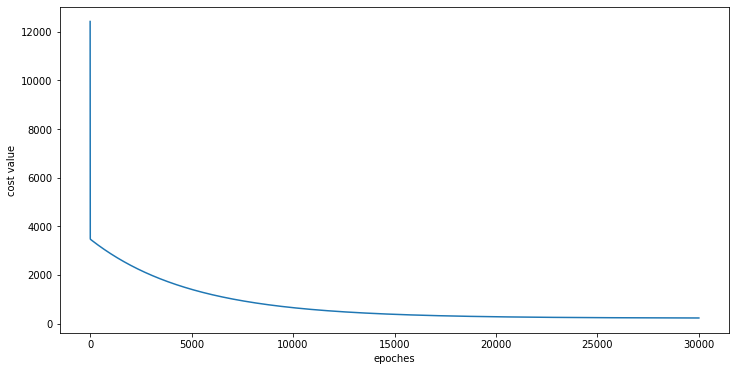

In [8]:
plt.figure(figsize=(12, 6))
plt.xlabel("epoches")
plt.ylabel("cost value")
plt.plot(range(0,epoches), J_res)

In [9]:
x_list=[]
for x in X:
    x_list.append(x[1])
    
pred=[]
for x in X:
    pred.append(H(x))

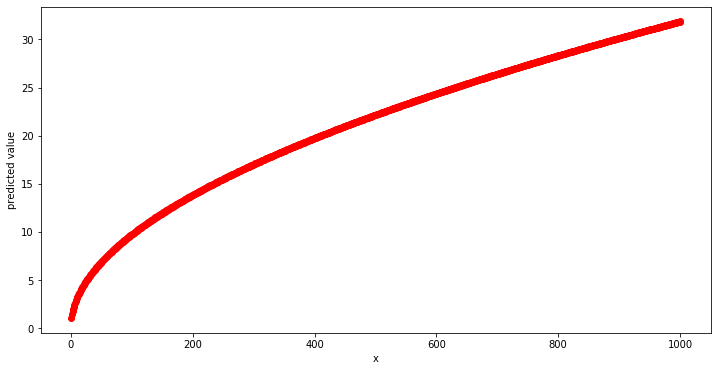

In [13]:
plt.figure(figsize=(12, 6))
plt.xlabel("x")
plt.ylabel("predicted value")
plt.plot(x_list, pred, "or")

In [11]:
print("x=", X[99][1])
print("predicted value:", H(X[99]), "\tlabel:",Y[99], "\t실제 root값:", math.sqrt(X[99][1]))

x= 100.0
predicted value: 9.734067010345782 	label: 11.90119516 	실제 root값: 10.0


편미분 값을 보고 learning rate를 결정할 수 있음.
relationship between learning rate and partial derivative 연구할 것